## Install all key packages

INSERT YOUR GROUP NUMBER: 9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score,cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from statistics import mean, stdev
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import datasets
from imblearn.over_sampling import SMOTE

from prettytable import PrettyTable

# Instructions
By now, you have seen the majority of code required for this project in class or in your homework assignment. You are to complete a series of parts for this project. They include:

1.   Describing your data (no code)
2.   Data Exploration
3.   Supervised Learning
4.   Unsupervised Learning

Within each section, you are asked to perform a series of analyses. Work smart. Work with each other. Be sure to adapt prior code.

**For the project, I have provided specific instructions but there is no "cheat sheet." The questions are adapted from prior scripts and/or assignments. This should not surprise you. Good luck!**



# Part 1: Describe your data (18 points)
This is conceptual. Please write full responses to the questions. Otherwise, points will be deducted.



**1. Desribe your dataset in 3-4 sentences (5 points)**

Data source：https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?datasetId=426827&sortBy=voteCount&select=application_record.csv

The dataset contains transactions made by credit cards by European cardholders. The dataset presents 438557 transactions that occurred in two days. The dataset is highly unbalanced, the positive class (frauds) account for 11.77% of all transactions. One  dataset contains the application infomation, and the other dataset contains the credit record.



**2. What research question are you trying to answer? (2 points)**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client

**3. What are your features? How many are there in total? (2 points)**

18 number of features:
- Gender (Male/ Female)
- Does client own a car? (1=Yes, 0=No)
- Does client own property? (1=Yes, 0=No)
- Does client own a work phone? (1=Yes, 0=No)
- Does client own a phone? (1=Yes, 0=No)
- Does client have an email address? (1=Yes, 0=No)
- Is client unemployed? (1=Yes, 0=No)
- Number of children
- Number of family members
- Total income (chinese yuan)
- **Age**: This is a new variable created by date of birth.
- Years employed
- Income category (Working, commerical associate, other)
- Education level (Secondary, higher education, other)
- Marital status (Married, Single/Not married, other)
- Way of living (House/apartment, With parents, other)
- Occupation (Laborer/ other)
- **length of the account:** This is a new variable created from the original variable month_balance. Month_balance indicates the month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

**4. What is your label? (2 points)**

Our label is binary variable representing the clients' risk (1=high risk, 0=low risk).

I choose users who overdue for more than 30 days as target risk users.

**5. If your label is a continuous variable, how will you dichtomoize it (i.e., turn it into a 0/1 indicator)? (2 points)**

Not appplicable.

If the label is a continuous variable, we can create a binary variable from it by setting a threshold value and considering any value above the threshold as 1, and below or equal to the threshold as 0. The threshold can be median value.

**6. Please provide a hypothesis as to what you believe the relationship between your features and label to be? Please provide a justficiation for your hypothesis (this does not require any research; just use your logic; this should be 4-5 sentences) (5 points)**

- Clients who are unemployed or have a low income are more likely to have a higher credit risk, as they may have limited financial resources to pay their credit card bills.

- Clients who own a car or property may have a lower credit risk, as they may have assets that can be used as collateral and may indicate financial stability.

- Clients who have a higher education level or a higher income category may have a lower credit risk, as they may have a better understanding of financial management and may have greater financial resources to meet their payment obligations.

- Clients who are younger or have a shorter employment history may have a higher credit risk, as they may have less experience managing their finances and may have less stable employment.

- Clients who have a larger number of children or family members may have a higher credit risk, as they may have more financial obligations to meet and may have less disposable income available to pay their credit card bills.

- Clients who have a work phone or phone or email may have a lower credit risk, as this may indicate that they have a steady source of income and may be easier to contact in the event of payment issues.

- Clients who are married may have a lower credit risk, as they may have greater financial stability and support from their spouse.

- Clients who work in a stable occupation, such as government or healthcare, may have a lower credit risk, as their employment is less likely to be affected by economic fluctuations.

- Clients who have a longer history of owning their credit card may have a lower credit risk, as this may indicate a responsible credit history and a track record of on-time payments.

# Part 2: Data Exploration (42 points)
Please answer all questions. Make sure everything is displayed so the TA's can easily grade each question. HINT: week 9 python script for Boston Housing data will be very helpful for this section.

**1. Import data set. Show the first five rows of data (2 points)**

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/6080 Final Project/final project/application_record.csv', index_col=None, header=0)
record = pd.read_csv('/content/drive/Shareddrives/6080 Final Project/final project/credit_record.csv', index_col=None, header=0)


In [ ]:
record

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

Create new variables

In [ ]:
# Create a variable for how many months account has been open for
begin_month = pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month = begin_month.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'})
begin_month['ACCOUNT_LENGTH'] = -begin_month['ACCOUNT_LENGTH']
new_data = pd.merge(data,begin_month,how="left",on="ID")

In [ ]:
# create the dependent variable, targeting on people with status 2,3,4,5
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='1']='Yes'
record['dep_value'][record['STATUS'] =='2']='Yes'
record['dep_value'][record['STATUS'] =='3']='Yes'
record['dep_value'][record['STATUS'] =='4']='Yes'
record['dep_value'][record['STATUS'] =='5']='Yes'

<ipython-input-65-f95ad1f1f2a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['dep_value'][record['STATUS'] =='1']='Yes'
<ipython-input-65-f95ad1f1f2a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['dep_value'][record['STATUS'] =='2']='Yes'
<ipython-input-65-f95ad1f1f2a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['dep_value'][record['STATUS'] =='3']='Yes'
<ipython-input-65-f95ad1f1f2a5>:6: SettingWith

In [ ]:
cnt = record.groupby('ID').count()
cnt['dep_value'][cnt['dep_value'] > 0] = 'Yes'
cnt['dep_value'][cnt['dep_value'] == 0] = 'No'
cnt = cnt[['dep_value']]
new_data = pd.merge(new_data,cnt,how='inner',on='ID')
new_data['target'] = new_data['dep_value']

new_data["target"].replace("Yes", 1, inplace=True)
new_data["target"].replace("No", 0, inplace=True)

In [ ]:
new_data=new_data.drop(['ID','FLAG_MOBIL','dep_value'], axis=1)

In [ ]:
new_data.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            Y               Y             0          427500.0   
1           M            Y               Y             0          427500.0   
2           M            Y               Y             0          112500.0   
3           F            N               Y             0          270000.0   
4           F            N               Y             0          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
0   Rented apartment      -12005          -4542                1           0   
1   Rented apartment      -12005          -4542                1           0   
2  House / apartment      -21474          -1134                0           0   
3  House / apartment      -19110          -3051                0           1   
4  House / apartment      -19110          -3051                0           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  ACCOUNT_LENGTH  target  
0           0             NaN              2.0            15.0       1  
1           0             NaN              2.0            14.0       1  
2           0  Security staff              2.0            29.0       0  
3           1     Sales staff              1.0             4.0       0  
4           1     Sales staff              1.0            26.0       0

Fill missing values

In [ ]:
new_data.isna().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
ACCOUNT_LENGTH             0
target                     0
dtype: int64

In [ ]:
data['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

Continuous Variables

In [ ]:
# Create age feature
new_data['AGE_YEARS']=-new_data['DAYS_BIRTH']/365.2425
new_data.drop('DAYS_BIRTH', axis=1, inplace=True)

# Create unemployed indicator
new_data['UNEMPLOYED']=0
new_data.loc[-new_data['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

# Create years employed feature
new_data['YEARS_EMPLOYED']=-new_data['DAYS_EMPLOYED']/365.2425
new_data.loc[new_data['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
new_data.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [ ]:
#change data types
new_data['CNT_FAM_MEMBERS'] = new_data['CNT_FAM_MEMBERS'].astype(int)

Enconding categorical variables

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for x in new_data:
#     if new_data[x].dtypes=='object':
#         new_data[x] = le.fit_transform(new_data[x])

Rename Columns

In [ ]:
new_data = new_data.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [ ]:
new_data.head()

Gender Own_car Own_property  Num_children  Total_income  \
0      M       Y            Y             0      427500.0   
1      M       Y            Y             0      427500.0   
2      M       Y            Y             0      112500.0   
3      F       N            Y             0      270000.0   
4      F       N            Y             0      270000.0   

            Income_type                 Education_type         Family_status  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

        Housing_type  Work_phone  Phone  Email Occupation_type  Num_family  \
0   Rented apartment           1      0      0             NaN           2   
1   Rented apartment           1      0      0             NaN           2   
2  House / apartment           0      0      0  Security staff           2   
3  House / apartment           0      1      1     Sales staff           1   
4  House / apartment           0      1      1     Sales staff           1   

   Account_length  Target        Age  Unemployed  Years_employed  
0            15.0       1  32.868574           0       12.435574  
1            14.0       1  32.868574           0       12.435574  
2            29.0       0  58.793815           0        3.104787  
3             4.0       0  52.321403           0        8.353354  
4            26.0       0  52.321403           0        8.353354

**2. Display dimension of the data (2 points)**

In [ ]:
print(np.shape(new_data))

(36457, 19)


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No risk', round(new_data['Target'].value_counts()[0]/len(new_data) * 100,2), '% of the dataset')
print('Risk', round(new_data['Target'].value_counts()[1]/len(new_data) * 100,2), '% of the dataset')

No risk 88.23 % of the dataset
Risk 11.77 % of the dataset


**3. Summarize the data to see the distribution of data (all of your features and label) (2 points)**

In [ ]:
round(new_data.describe(),2).transpose()

count       mean        std      min        25%        50%  \
Num_children    36457.0       0.43       0.74      0.0       0.00       0.00   
Total_income    36457.0  186685.74  101789.23  27000.0  121500.00  157500.00   
Work_phone      36457.0       0.23       0.42      0.0       0.00       0.00   
Phone           36457.0       0.29       0.46      0.0       0.00       0.00   
Email           36457.0       0.09       0.29      0.0       0.00       0.00   
Num_family      36457.0       2.20       0.91      1.0       2.00       2.00   
Account_length  36457.0      26.16      16.50      0.0      12.00      24.00   
Target          36457.0       0.12       0.32      0.0       0.00       0.00   
Age             36457.0      43.74      11.50     20.5      34.12      42.61   
Unemployed      36457.0       0.17       0.37      0.0       0.00       0.00   
Years_employed  36457.0       6.02       6.48      0.0       1.12       4.25   

                      75%         max  
Num_children         1.00       19.00  
Total_income    225000.00  1575000.00  
Work_phone           0.00        1.00  
Phone                1.00        1.00  
Email                0.00        1.00  
Num_family           3.00       20.00  
Account_length      39.00       60.00  
Target               0.00        1.00  
Age                 53.22       68.86  
Unemployed           0.00        1.00  
Years_employed       8.63       43.02

**4. Display the boxplots of your data (all of your features and label) (2 points)**

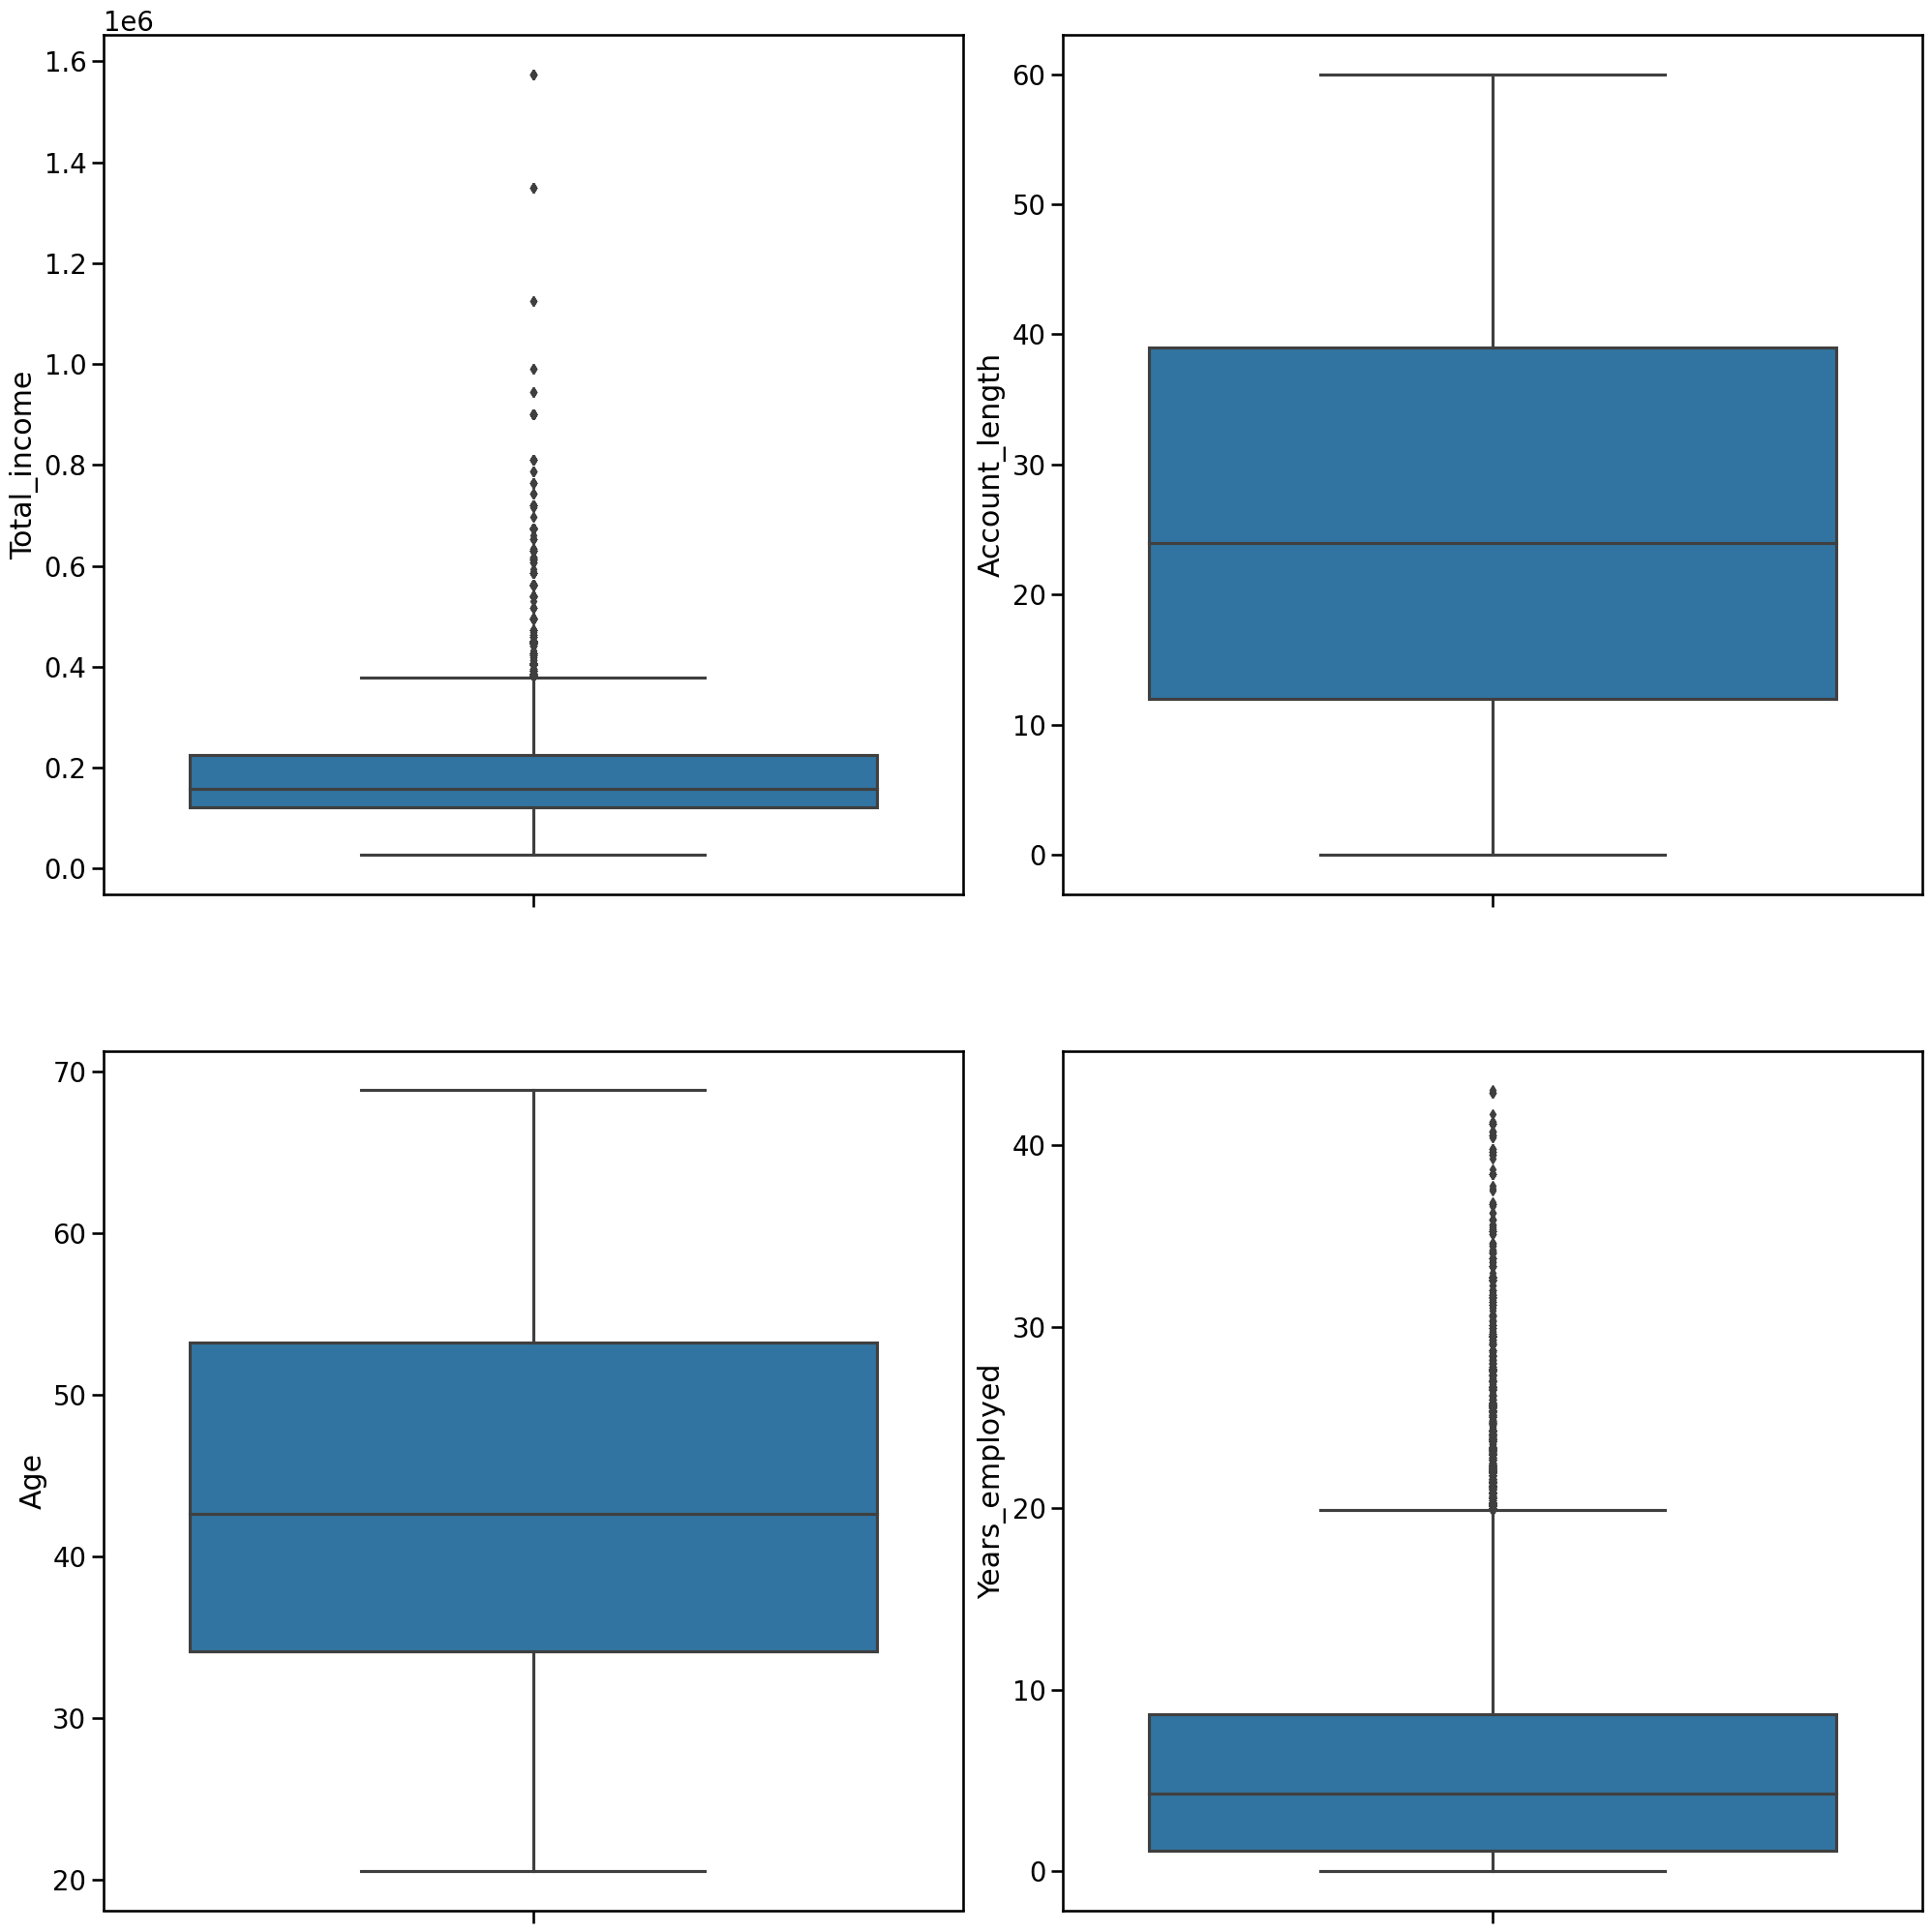

In [ ]:
#boxplot for continuous variables
data = new_data[['Total_income','Account_length','Age','Years_employed']]
sns.set_context('talk', font_scale=1.2)
fig,axs = plt.subplots (ncols=2, nrows=2, figsize=(20,20))
index=0
axs=axs.flatten()
for k,v in data.items():
  sns.boxplot(y=k, data=data, ax=axs[index])
  index+=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

**5. Based on your boxplots in Q4, do any of your variables appear to have outliers? If yes, which ones? (2 points)**

Yes. The continuous variables of clients' total income and years employed seem to have outliers.

**6. Write a program to show exactly what percentage of data are outliers (outliers are defined as variable 1.5 standard deviations above and below the IQR) (4 points)**

In [ ]:
for k, v in data.items():
    # Check if column is numeric
    if np.issubdtype(v.dtype, np.number):
        q1 = v.quantile(.25)
        q3 = v.quantile(.75)
        iqr = q3 - q1

        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(new_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))


Column Total_income outliers = 4.19%
Column Account_length outliers = 0.00%
Column Age outliers = 0.00%
Column Years_employed outliers = 4.86%


**7. Based on the program you wrote in Q6, which variables have a large percentage of outliers? (2 points)**

The variables indicating clients' total income (in Chinese yuan) and years employed have a greater percentage of outliers, 4.19% and 4.86% respectively, but it seems not be big issues.

**8. Visualize the distributions of all of your variables (i.e., display histograms) (2 points)**

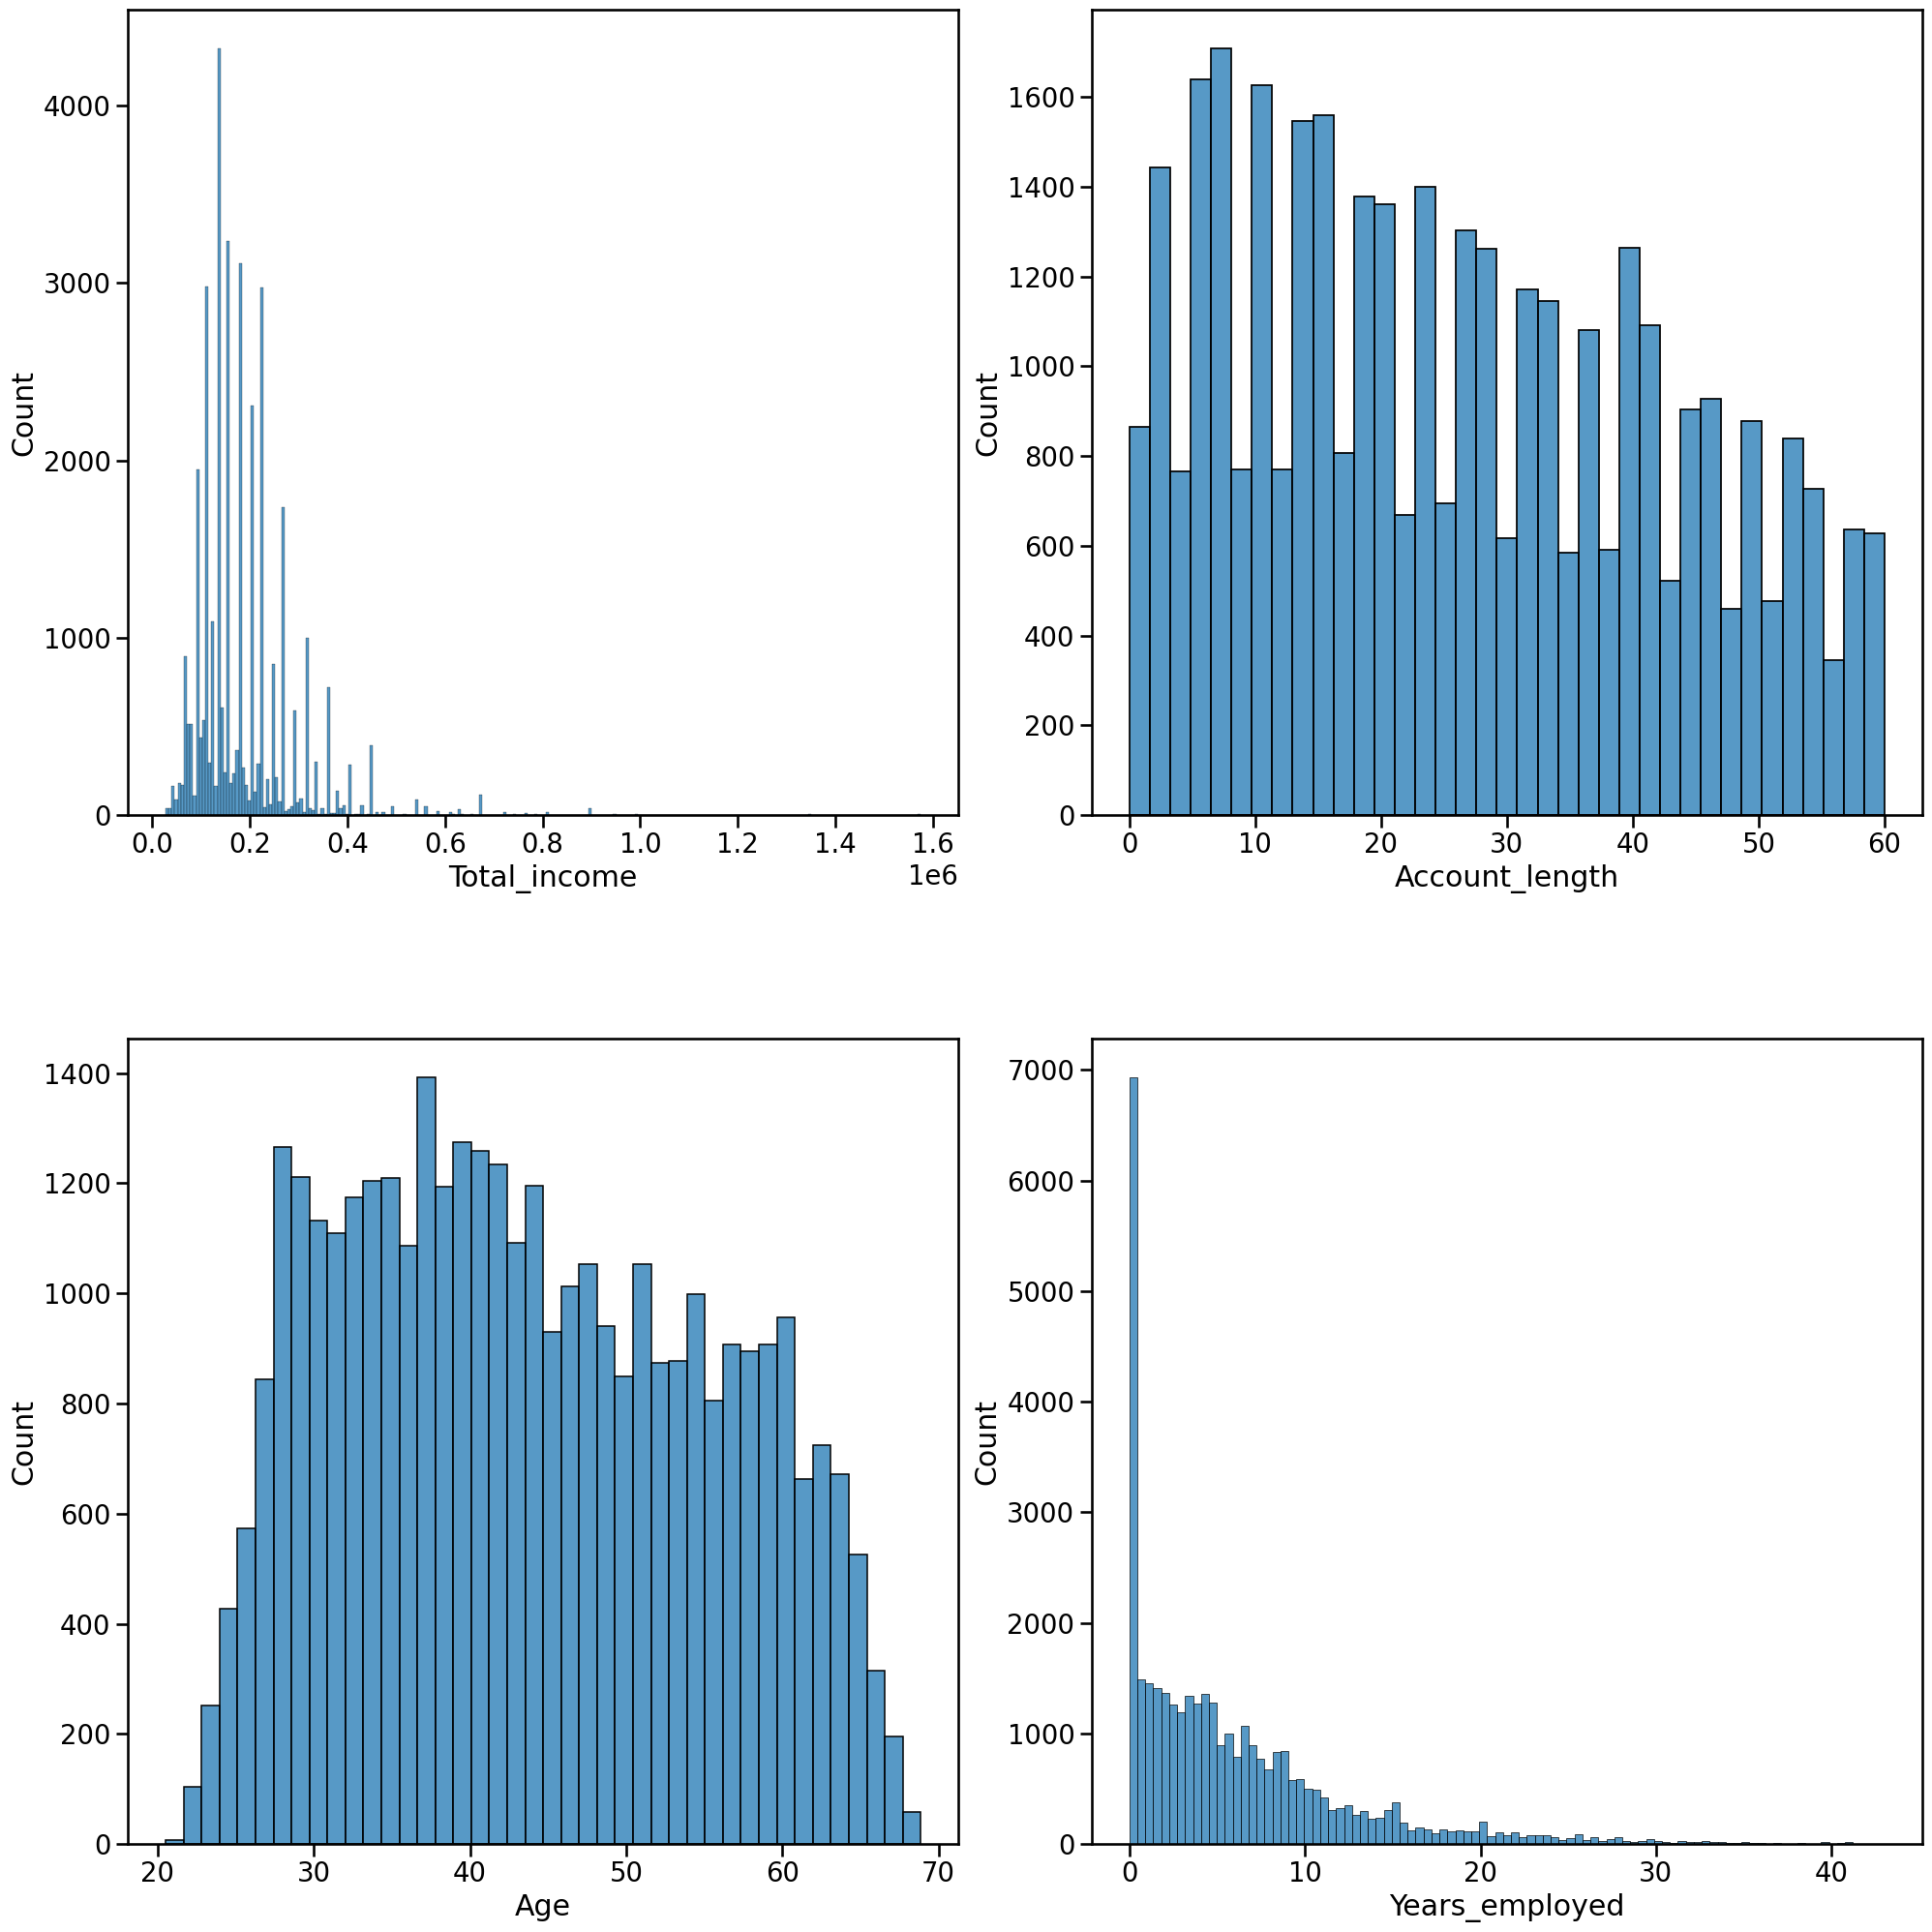

In [ ]:
sns.set_context('talk', font_scale=1.2)
fig,axs = plt.subplots (ncols=2, nrows=2, figsize=(20,20))
index=0
axs=axs.flatten()
for k,v in data.items():
  sns.histplot(v, ax=axs[index])
  index+=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

**9. What do you notice about the scale for your features? (2 points)**

Some features are much larger or smaller than others (i.e different unit of measurement), it can cause issues for some machine learning models such as K-Nearest Neighbors.

In this case, normalization or scaling can help ensure that neither feature is overweighted relative to the other in the model.

**10. Standardize your features only and display distributions for all variables (features + Label)? (2 points)**

**moving forward, you only use the standardized version of your features for all subsequent analysis**

In [ ]:
column_sels=['Total_income','Account_length','Age','Years_employed']
x = new_data.loc[:,column_sels]
min_max_scaler=preprocessing.MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Create normalized DataFrame
df_norm = pd.concat([x, new_data['Target']], axis=1)

# Add normalized columns to new_data
new_data = pd.concat([new_data.drop(['Total_income','Account_length','Age','Years_employed'],axis=1), df_norm[column_sels]], axis=1)

In [ ]:
new_data

Gender Own_car Own_property  Num_children           Income_type  \
0          M       Y            Y             0               Working   
1          M       Y            Y             0               Working   
2          M       Y            Y             0               Working   
3          F       N            Y             0  Commercial associate   
4          F       N            Y             0  Commercial associate   
...      ...     ...          ...           ...                   ...   
36452      M       Y            Y             0               Working   
36453      F       N            Y             0  Commercial associate   
36454      F       N            Y             0             Pensioner   
36455      F       N            Y             0               Working   
36456      M       N            Y             0               Working   

                      Education_type         Family_status       Housing_type  \
0                   Higher education        Civil marriage   Rented apartment   
1                   Higher education        Civil marriage   Rented apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
36452  Secondary / secondary special               Married  House / apartment   
36453               Higher education               Married  House / apartment   
36454               Higher education               Married  House / apartment   
36455  Secondary / secondary special               Married  House / apartment   
36456  Secondary / secondary special  Single / not married   Rented apartment   

       Work_phone  Phone  Email Occupation_type  Num_family  Target  \
0               1      0      0             NaN           2       1   
1               1      0      0             NaN           2       1   
2               0      0      0  Security staff           2       0   
3               0      1      1     Sales staff           1       0   
4               0      1      1     Sales staff           1       0   
...           ...    ...    ...             ...         ...     ...   
36452           0      0      0        Managers           2       1   
36453           0      1      1  Medicine staff           2       1   
36454           0      1      1  Medicine staff           2       1   
36455           0      0      0     Sales staff           2       1   
36456           0      0      0        Laborers           1       1   

       Unemployed  Total_income  Account_length       Age  Years_employed  
0               0      0.258721        0.250000  0.255676        0.289060  
1               0      0.258721        0.233333  0.255676        0.289060  
2               0      0.055233        0.483333  0.791768        0.072170  
3               0      0.156977        0.066667  0.657929        0.194170  
4               0      0.156977        0.433333  0.657929        0.194170  
...           ...           ...             ...       ...             ...  
36452           0      0.186047        0.183333  0.558172        0.154013  
36453           0      0.084302        0.383333  0.277303        0.084325  
36454           0      0.084302        0.533333  0.277303        0.084325  
36455           0      0.165698        0.150000  0.592708        0.041685  
36456           0      0.055233        0.216667  0.096190        0.075924  

[36457 rows x 19 columns]

**11. Visualize the distributions of all of your standardized variables (i.e., display histograms) (2 points)**

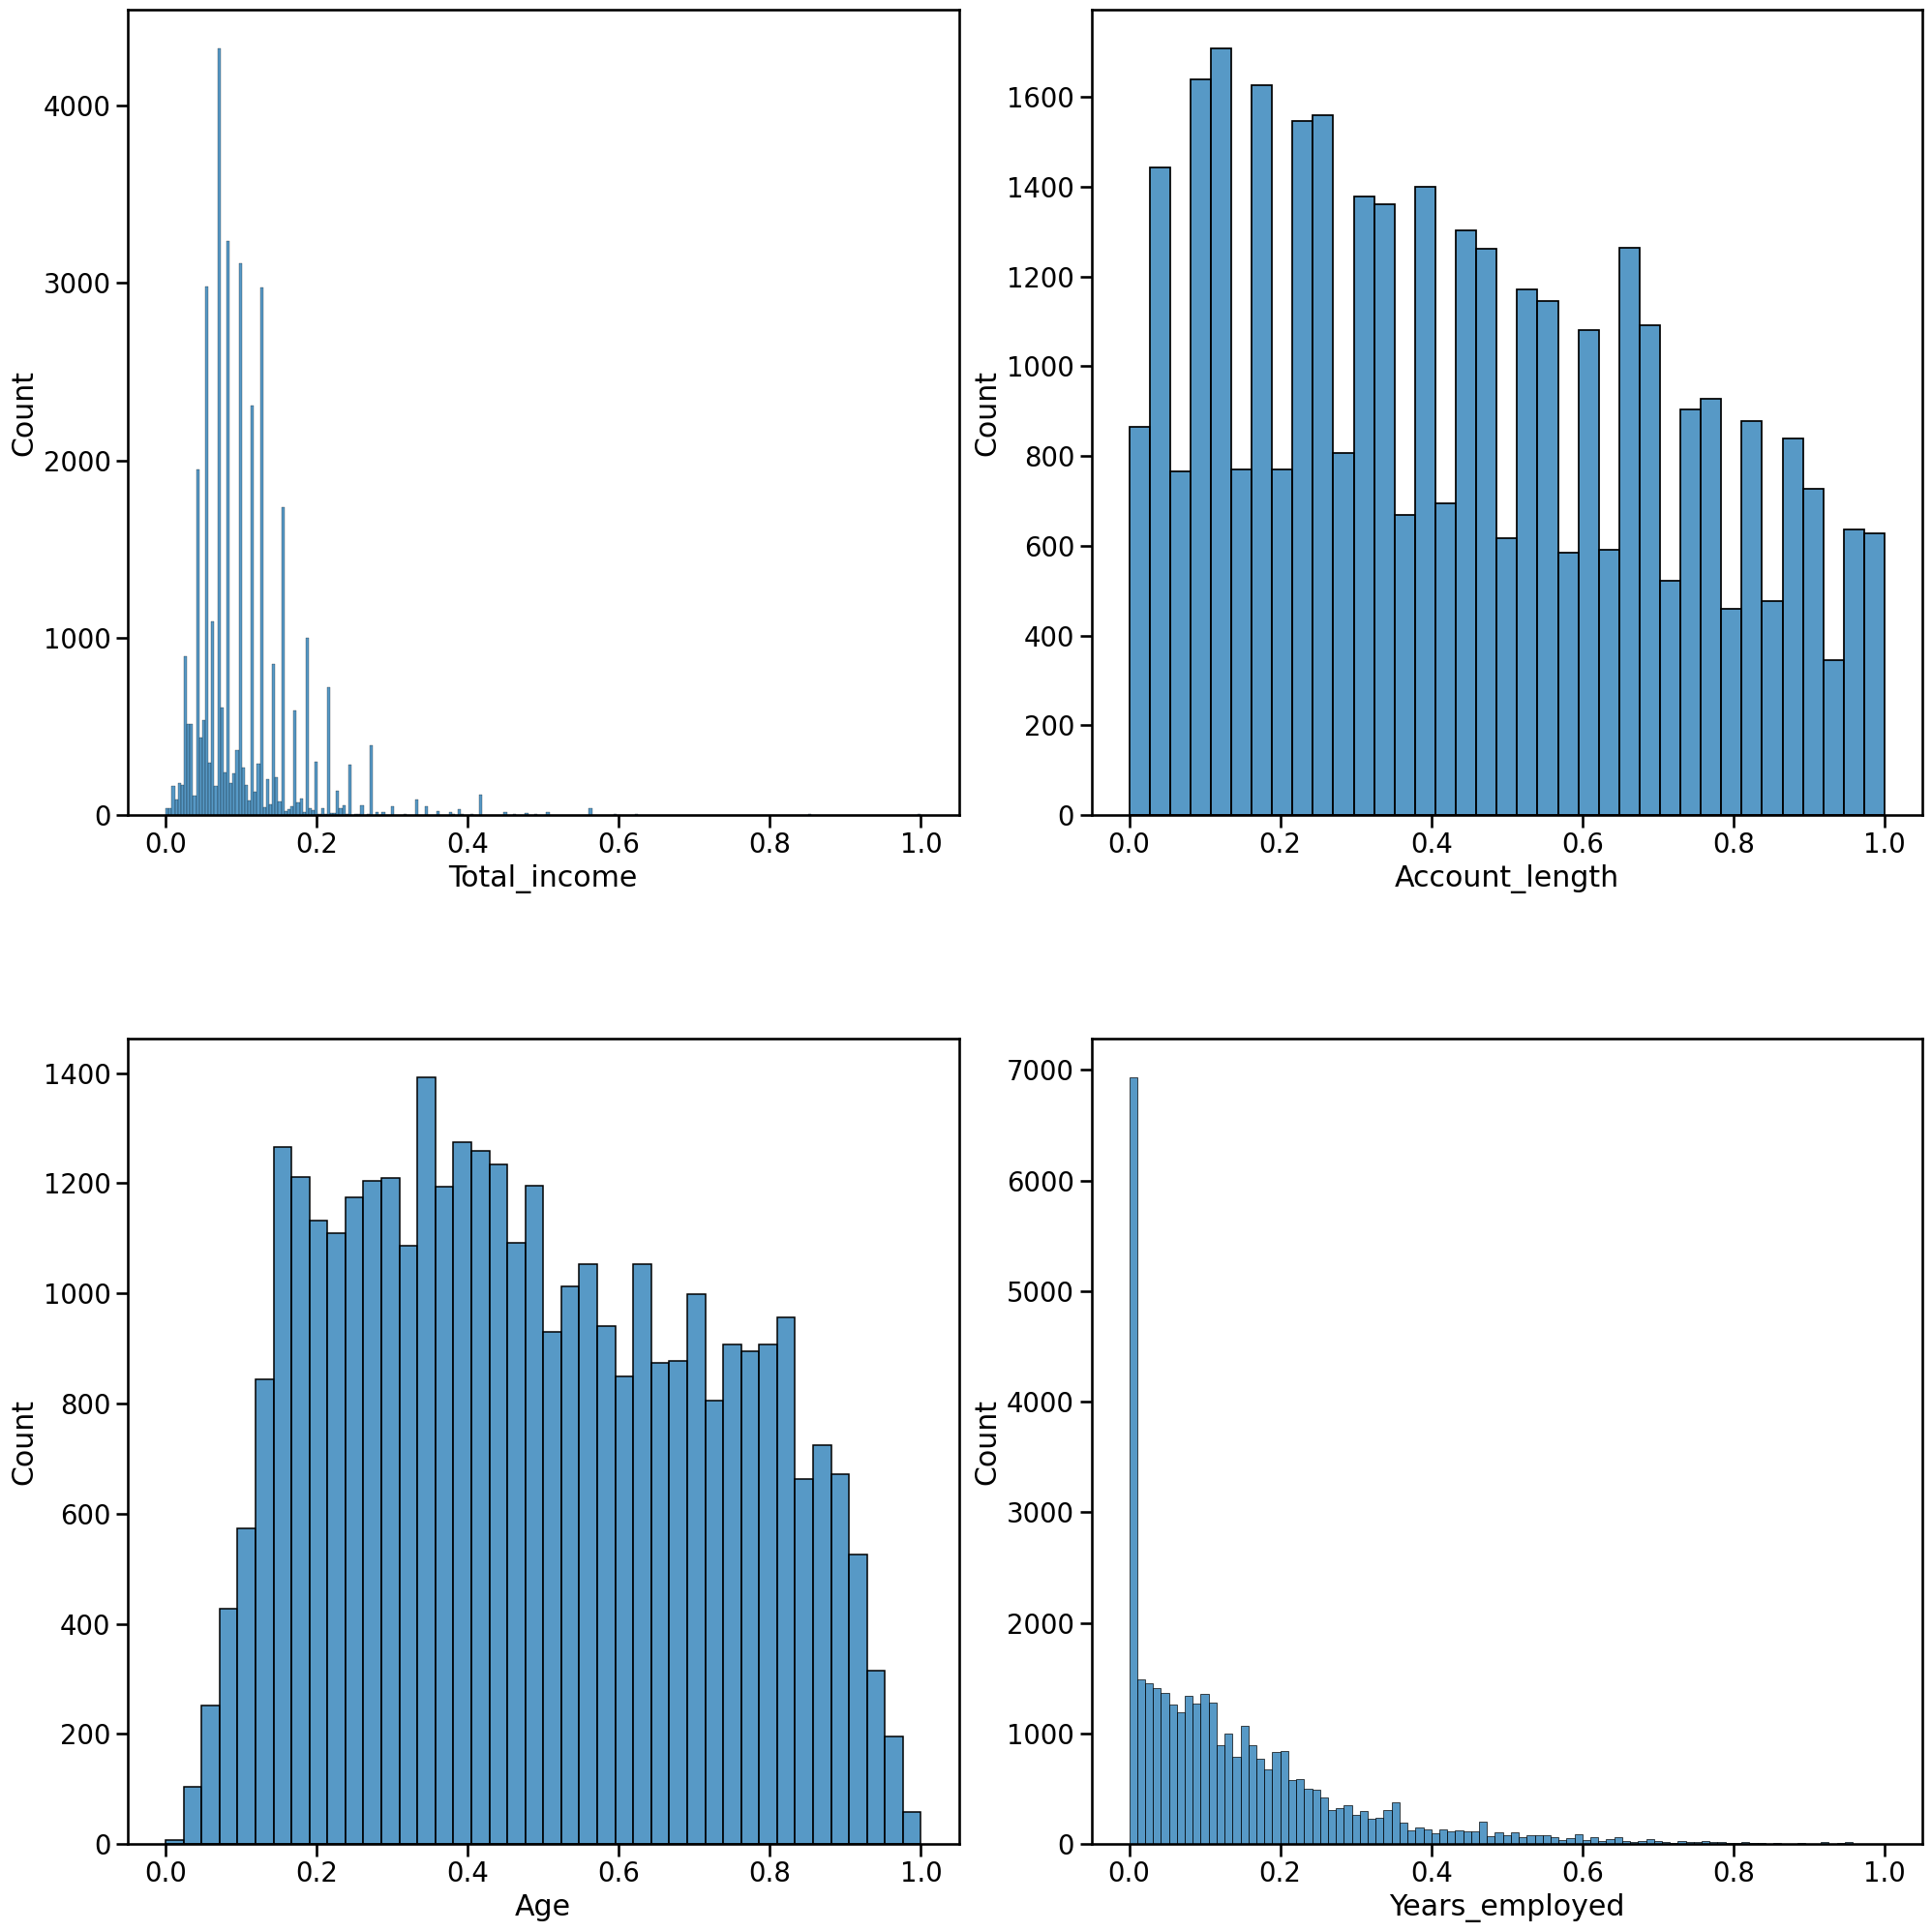

In [ ]:
sns.set_context('talk', font_scale=1.2)
fig,axs = plt.subplots (ncols=2, nrows=2, figsize=(20,20))
index=0
axs=axs.flatten()
for k,v in x.items():
  sns.histplot(v, ax=axs[index])
  index+=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

**12. Which variables appear to be normally distributed? Which are left- vs. right-skewed? Which variables have a bimodal distribution? (4 points)**

Clients' total income appear to have a normal distribution. The account length and clients' employed years are right skewed. Age seems to be a bimodal distribution.

**13. Display a correlation matrix for all of your variables (both labels and features) (2 points)**

<ipython-input-85-446c3dc5cc3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(new_data.corr().abs(),2), annot=True)


<Axes: >

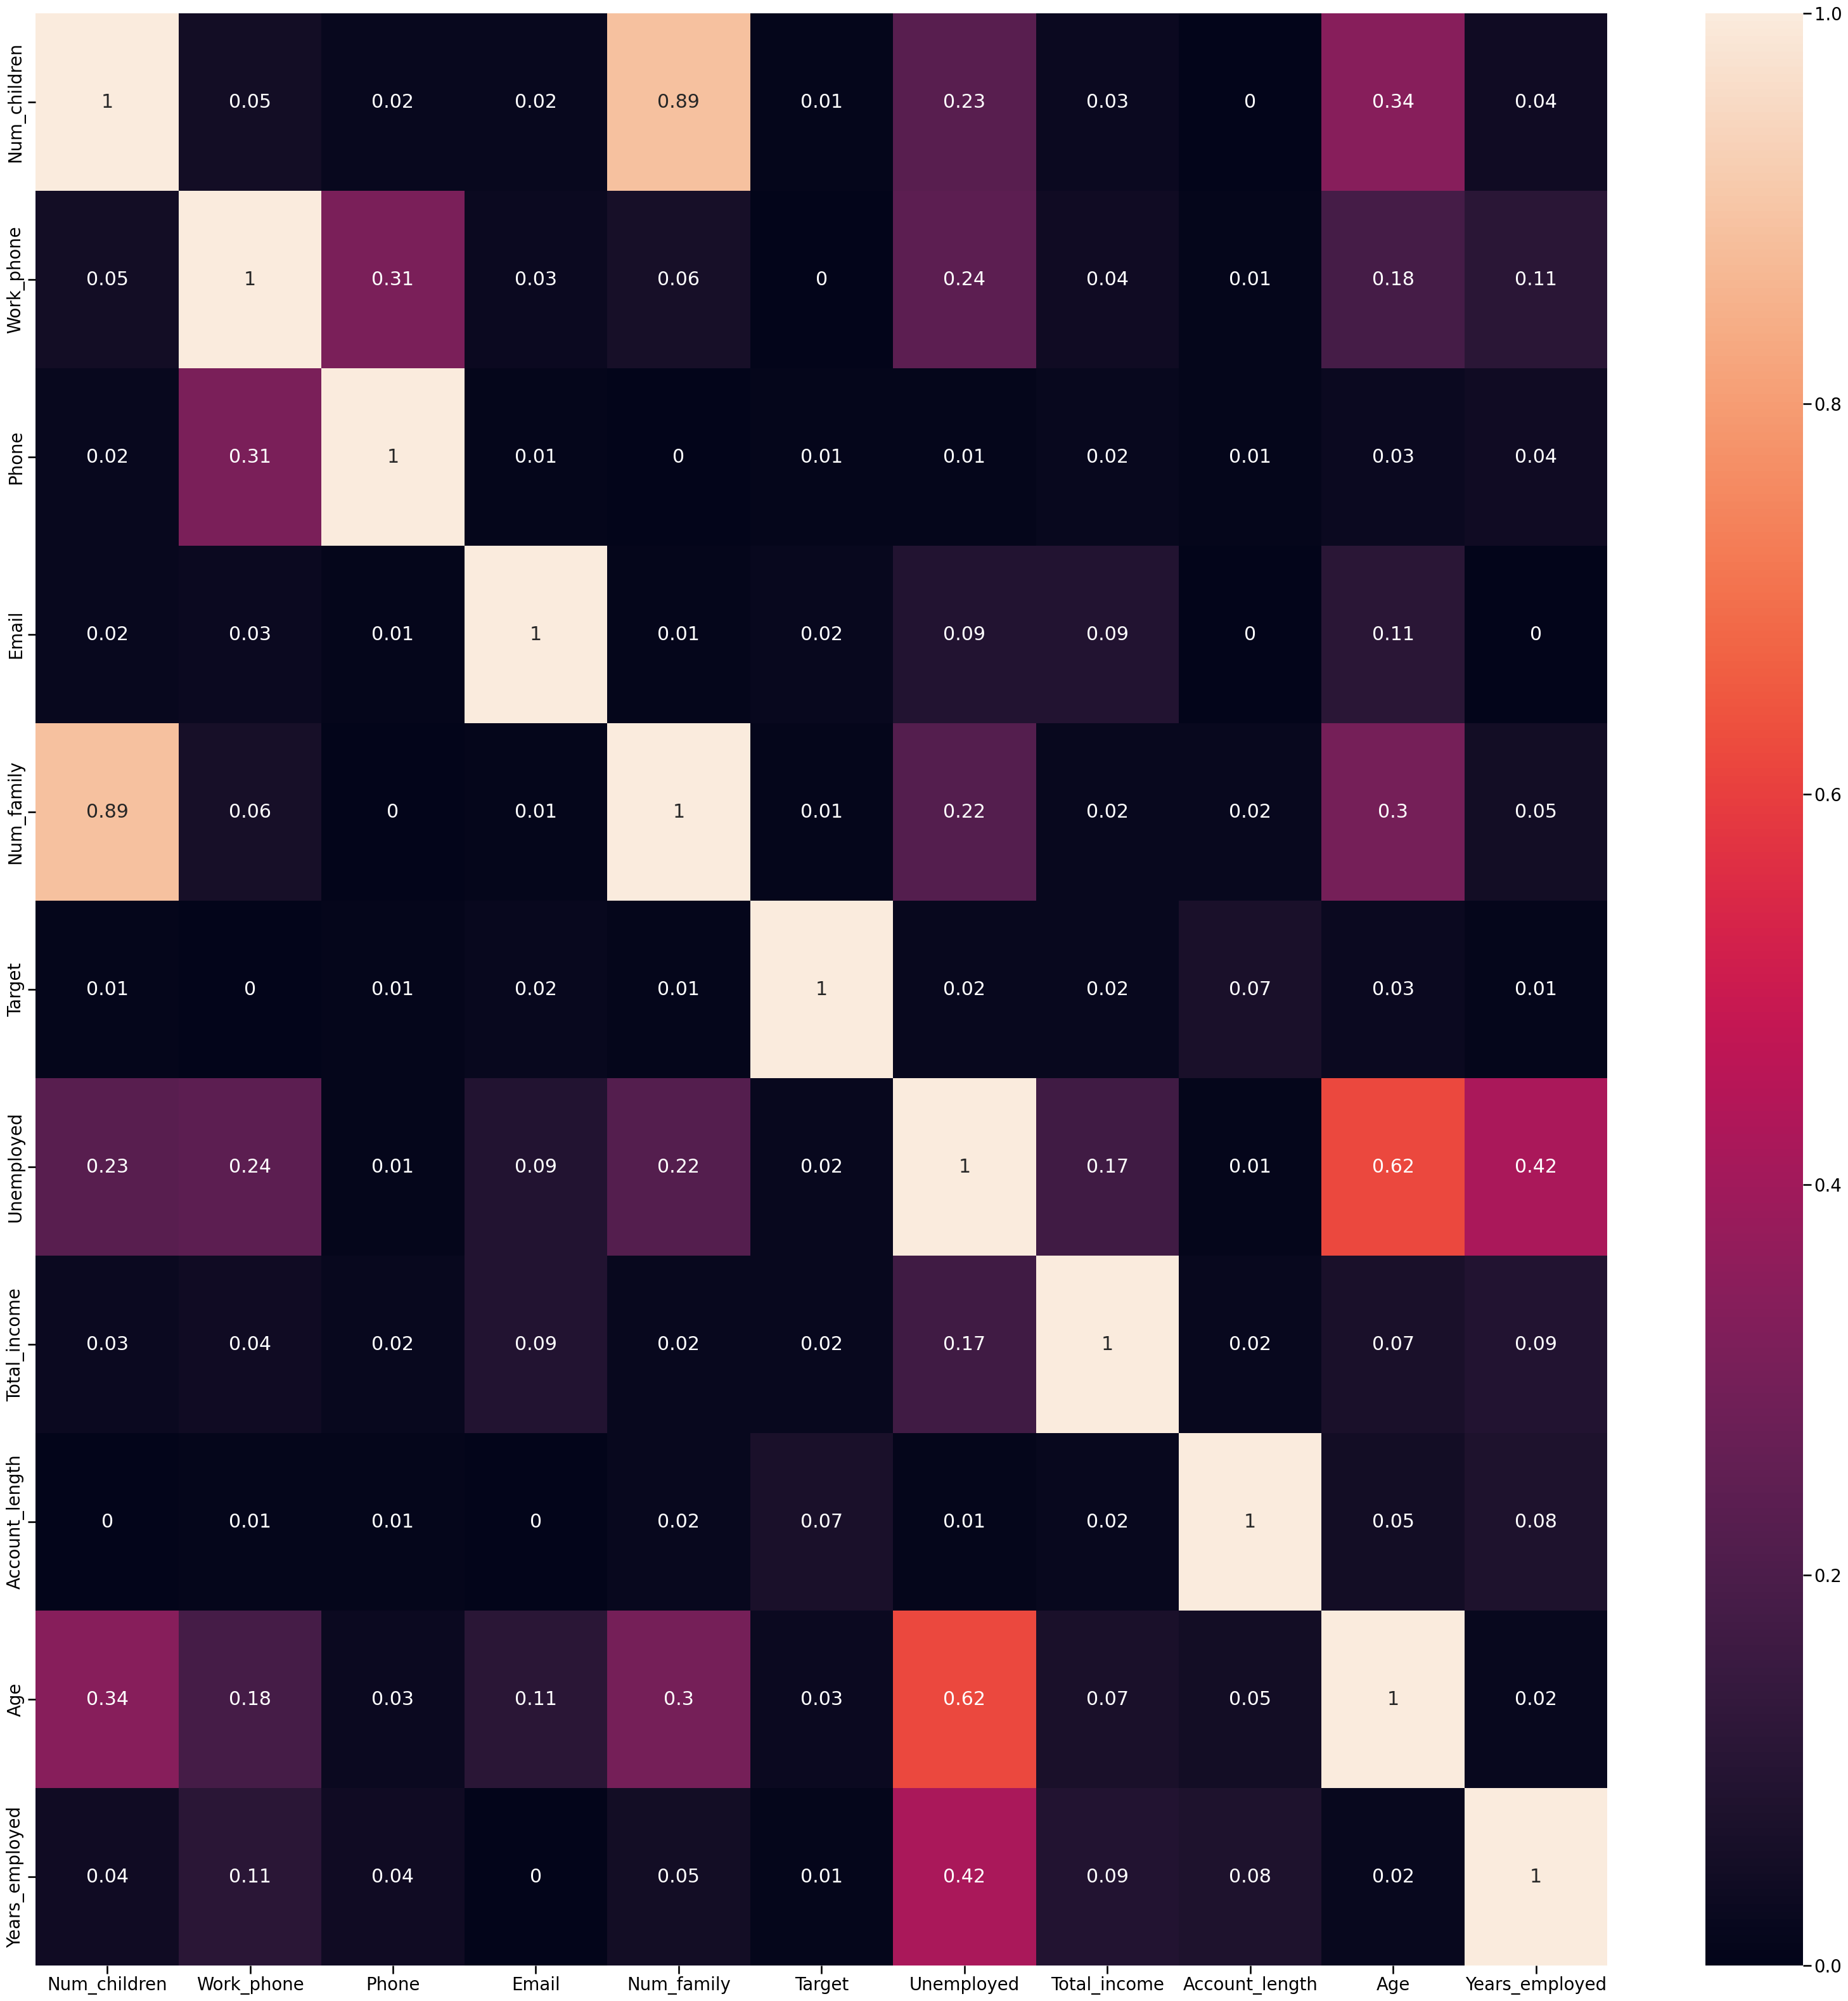

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(round(new_data.corr().abs(),2), annot=True)
#what happened to flag_mobil
#should I use the normalized value to do correlation plot

**14. Which features are most correlated with your label (0.5 or greater)? (2 points)**

All variables have lower correlation (<0.5) with the target variable, the highest correlation between target variable and other features is the length of account with 0.07.

**15. Which features are most correlated with each other (0.5 or greater)? (2 points)**


Several features appear to be correlated with other features, including:
- Number of child are highly correlated with family size of clients, with 89%.
- Age of client is highly correlated with the unemployed status, with 62%.


**16. What does feature correlation raise concerns of? What is one (unsupervised learning) method that will ensure no features are correlated? (2 points)**

It raises the issue of multicolinearity. One unsupervised learning method that can ensure no features are correlated is Principal Component Analysis (PCA), which can be used to reduce the dimensionality of a dataset by projecting the original features onto a new set of uncorrelated features.

**18. Visualize a scatterplot of your features and labels. One plot per feature. X-axis should display the feature. y-axis the label? (2 points)**

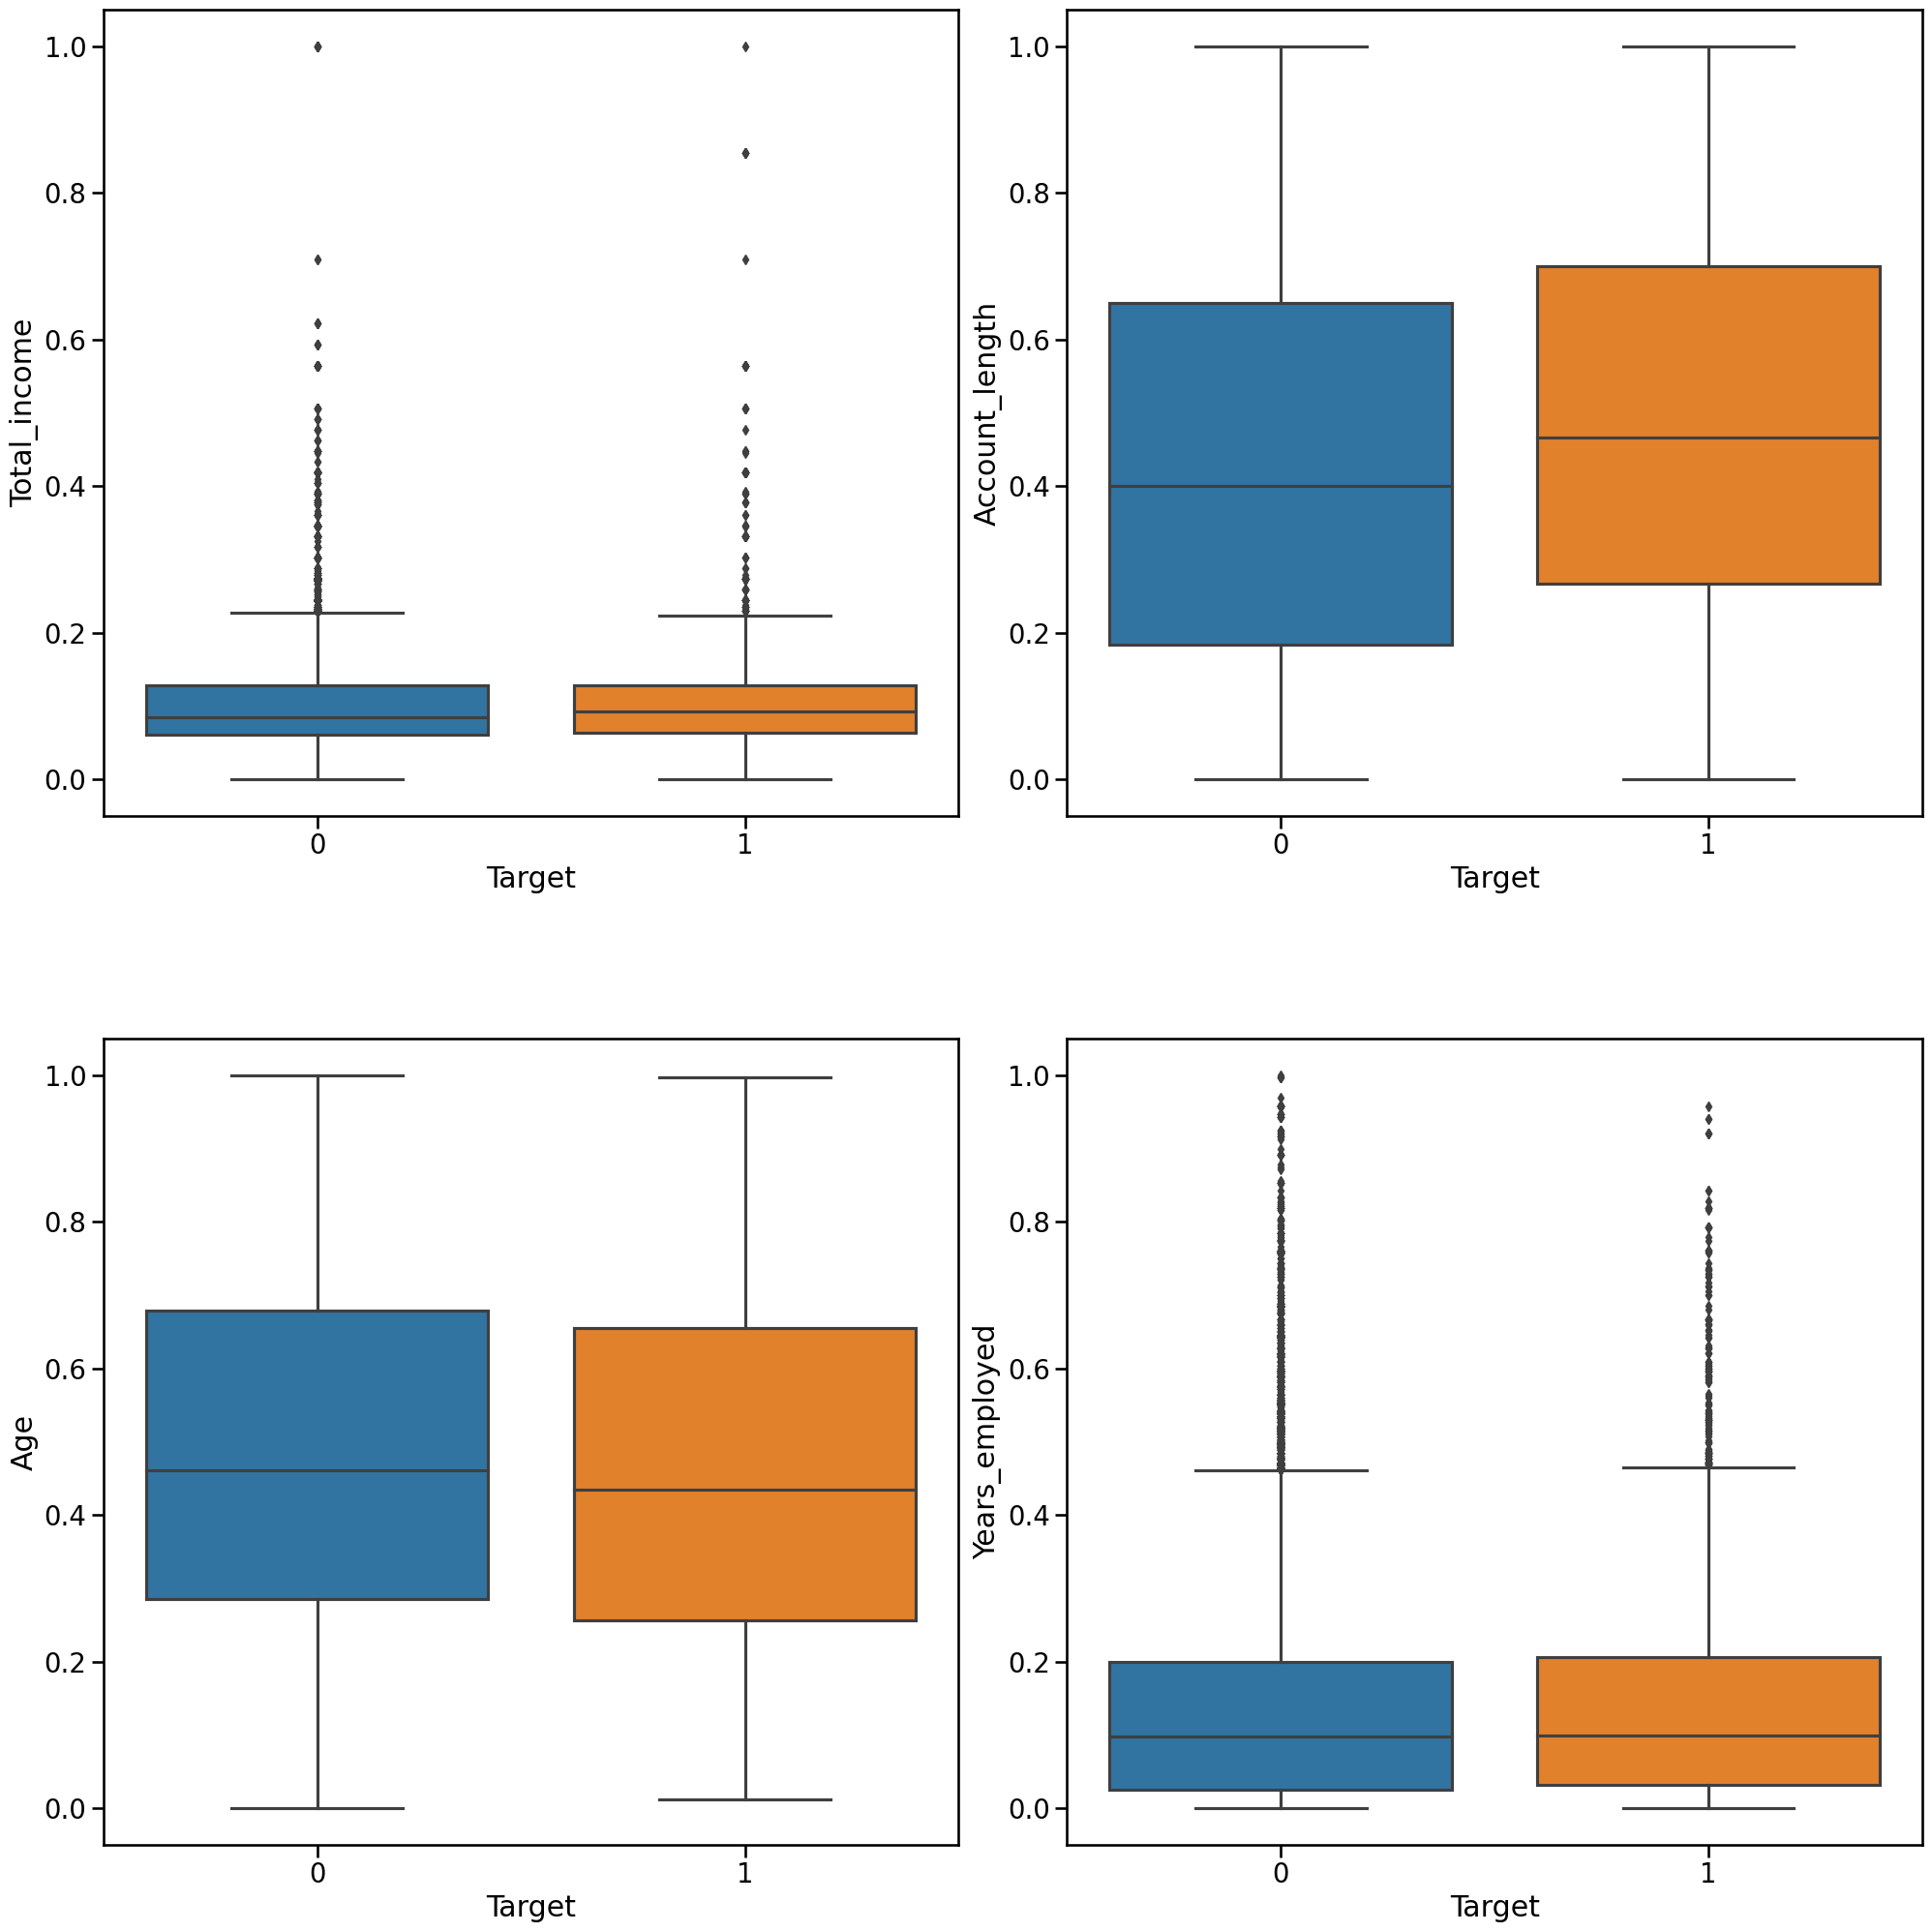

In [ ]:
fig,axs = plt.subplots (ncols=2, nrows=2, figsize=(20,20))
index=0
axs=axs.flatten()
sns.boxplot(y='Total_income', x='Target', data=df_norm, ax=axs[0])
sns.boxplot(y='Account_length', x='Target', data=df_norm, ax=axs[1])
sns.boxplot(y='Age', x='Target', data=df_norm, ax=axs[2])
sns.boxplot(y='Years_employed', x='Target', data=df_norm, ax=axs[3])

plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

**18. Based on your exploratory analysis, if you had to select a subset of features, which features would you select going forward? Please provide a justification. (4 points)**

I might select all variables except for the family size, because family size have multicolinearity issue, that is highly correlated  with the number of children. All the other variables would be important indicators for the clients' risk, more justifications are provided in Part1.

# Part 3: Supervised learning (45 points)
HINT: Adapt prior code! Assignment 5 will be very helpful. **USE THE STANDARDIZED VERSION OF YOUR FEATURES**

a) Compare Naïve Bayes, Logistic Regression, SVMs, Decision Trees, Random Forests, and Adaboost (6 total alogirthms).
*   Use the binary version of your label. Remember that you converted your continuous outcome to a binary variable above.
*   Use all your features in the model (do not use the subset)
*   You are likely wondering when you learned Adaboost. You watched a video on it. It is a boosting method. However, you did not learn how to apply it in Python. Still, I want to see that you can continue to build on your machine learning knowledge outside of the classroom. This is your opportunity to do so. You have all the pre-requisite knowledge.

b) For each model above, I want you to perform the following optimizations:
Part 2. Subset of features included in the model.

*   Hold one out (80/20 train/test split) (this is your baseline model)
*   Hold one out (90/10 train/test split)
*   5-fold cross-validation (80/20 train/test split)
*   10-fold cross-validation (90/10 train/test split)
*   10-fold stratified cross-validation (90/10 train/test split)
*   10-fold cross-validation with subset of features identified above (90/10 train/test split)
*   Select **two** hyperparameter tunings for each of these models. For example, for Logistic Regresion, you might select the L1 and L2 regularization. For Bayes, you might use two other distributions. For SVM, this could be to evaluate different kernels including a polynomial kernel and a radial basis function kernel. For decision trees / random forest, you might have to tweak node / leaf sizes. You will have to look into hyperaparemter tunings for Adaboost and that is ok! **Use 10-fold cross-validation (90/10 train/test split) with ALL features.**

In [ ]:
#insert code and comment *appropriately* (15 points)


In [ ]:
# Create the features and target variables
X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']

## Logistic Regression

Hold one out (80/20 train/test split):
Accuracy Score:  0.5610257816785519
Cohen's Kappa Score:  0.038240478488062


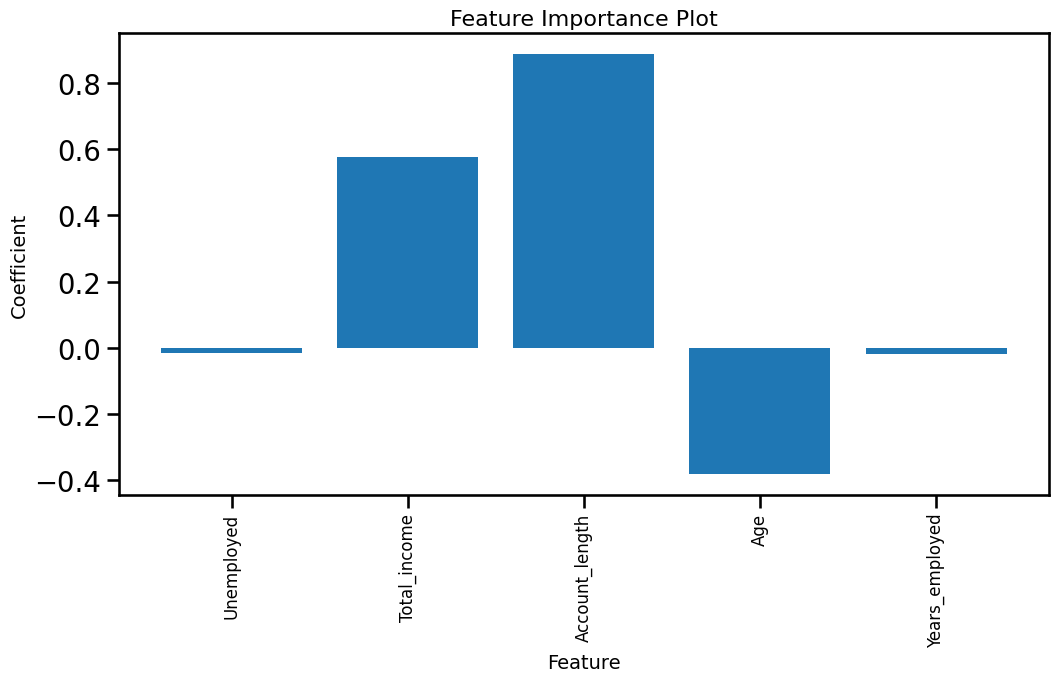

Hold one out (90/10 train/test split):
Accuracy Score:  0.5595172792100932
Cohen's Kappa Score:  0.04011391143012544

5-fold cross-validation (80/20 train/test split):
Accuracy Score: 0.8822996972574864
Cohen's Kappa Score: 0.038240478488062

10-fold cross-validation (90/10 train/test split):
Accuracy Score: 0.8822996959292443
Cohen's Kappa Score: 0.04011391143012544

10-fold stratified cross-validation (90/10 train/test split):
Accuracy Score: 0.8822996959292443
Cohen's Kappa Score: 0.04011391143012544

10-fold cross-validation with subset of features (90/10 train/test split):
Accuracy Score: 0.8822996959292443
Cohen's Kappa Score: 0.03001663117837894


In [ ]:
#Logistic regression

# Split data into 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

#low risk. high risk redefining

# 1. Hold one out (80/20 train/test split)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (80/20 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

import matplotlib.pyplot as plt

# Get the coefficients of each feature
coef = model.coef_[0]

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90, fontsize=12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Coefficient', fontsize=14)
plt.title('Feature Importance Plot', fontsize=16)
plt.show()

 # 2. Hold one out (90/10 train/test split)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train_90, y_train_90 = sm.fit_resample(X_train_90, y_train_90)
model = LogisticRegression()
model.fit(X_train_90, y_train_90)
y_pred_90 = model.predict(X_test_90)
acc_score = accuracy_score(y_test_90, y_pred_90)
kappa_score = cohen_kappa_score(y_test_90, y_pred_90)
print("Hold one out (90/10 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

# 3. 5-fold cross-validation (80/20 train/test split)
cv_scores = cross_val_score(model, X, y, cv=5)
acc_score_cv = cv_scores.mean()
kappa_score_cv = cohen_kappa_score(y_test, y_pred)
print("\n5-fold cross-validation (80/20 train/test split):")
print("Accuracy Score:", acc_score_cv)
print("Cohen's Kappa Score:", kappa_score_cv)

# 4. 10-fold cross-validation (90/10 train/test split)
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test_90, y_pred_90)
print("\n10-fold cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)

# 5. 10-fold stratified cross-validation (90/10 train/test split)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf)
acc_score_strat_cv = cv_scores.mean()
kappa_score_strat_cv = cohen_kappa_score(y_test_90, y_pred_90)
print("\n10-fold stratified cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_strat_cv)
print("Cohen's Kappa Score:", kappa_score_strat_cv)

# 6. 10-fold cross-validation with subset of features identified above (90/10 train/test split)
X = new_data[['Unemployed', 'Total_income',	'Account_length',	'Age',	'Years_employed']]
y = new_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test, y_pred)
print("\n10-fold cross-validation with subset of features (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)

In [ ]:
# 7. Use L1 regulation to tune the model
X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']

# Define a logistic regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model using cross-validation
cv_scores = cross_val_score(model_l1, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test_90, y_pred_90)

print("\n10-fold cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)


10-fold cross-validation (90/10 train/test split):
Accuracy Score: 0.8822996959292443
Cohen's Kappa Score: 0.023657594451292452


In [ ]:
# 8. Use L2 regulation to tune the model
X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']

# Define a logistic regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state = 123)

# Train the model using cross-validation
cv_scores = cross_val_score(model_l2, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test_90, y_pred_90)

print("\n10-fold cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)


10-fold cross-validation (90/10 train/test split):
Accuracy Score: 0.8822996959292443
Cohen's Kappa Score: 0.023657594451292452


## SVM

In [ ]:
#SVMs
model = SVC(kernel='linear')
#Baseline Model: Hold one out (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (80/20 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

Hold one out (80/20 train/test split):
Accuracy Score:  0.7812671420735052
Cohen's Kappa Score:  0.013611465328995265


In [ ]:
#Hold one out (90/10 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (90/10 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

Hold one out (90/10 train/test split):
Accuracy Score:  0.7591881513987931
Cohen's Kappa Score:  -0.037287669865727624


In [ ]:
model = SVC(kernel='linear')
# Define custom scorers for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'cohen_kappa': make_scorer(cohen_kappa_score)
}

# 3. 5-fold cross-validation (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True,random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("5-fold cross-validation (80/20 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

# 4. 10-fold cross-validation (90/10 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True,random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold cross-validation (90/10 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

# 5. 10-fold stratified cross-validation (90/10 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold stratified cross-validation (90/10 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

5-fold cross-validation (80/20 train/test split)
Average Accuracy Score:  0.8832324517644482
Average Cohen's Kappa Score:  0.014069433330390768
10-fold cross-validation (90/10 train/test split)
Average Accuracy Score:  0.8834791985053052
Average Cohen's Kappa Score:  0.017536614255234173
10-fold stratified cross-validation (90/10 train/test split)
Average Accuracy Score:  0.8834791985053052
Average Cohen's Kappa Score:  0.017536614255234173


In [ ]:
# 6. 10-fold cross-validation with subset of features identified above (90/10 train/test split)
X = new_data[['Unemployed', 'Total_income',	'Account_length',	'Age',	'Years_employed']]
y = new_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model = SVC(kernel='linear',random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test, y_pred)
print("\n10-fold cross-validation with subset of features (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)


10-fold cross-validation with subset of features (90/10 train/test split):
Accuracy Score: 0.8822996959292443
Cohen's Kappa Score: 0.028500422272675907


In [ ]:
model=SVC(kernel='poly')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True,random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold cross-validation (90/10 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

10-fold cross-validation (90/10 train/test split)
Average Accuracy Score:  0.8827934553679663
Average Cohen's Kappa Score:  0.00826185215302474


In [ ]:
scorers = {
    'accuracy': 'accuracy',
    'cohen_kappa': make_scorer(cohen_kappa_score)
}

In [ ]:
model=SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True,random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold cross-validation (90/10 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

10-fold cross-validation (90/10 train/test split)
Average Accuracy Score:  0.8822722911855599
Average Cohen's Kappa Score:  -5.477609190511768e-05


##Random Forest

In [ ]:
#random forest
model = RandomForestClassifier(random_state=123)
# Baseline model: Hold one out (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Baseline model: Hold one out (80/20 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

# Hold one out (90/10 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (90/10 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)


Baseline model: Hold one out (80/20 train/test split):
Accuracy Score:  0.9768239166209545
Cohen's Kappa Score:  0.2235691118173181
Hold one out (90/10 train/test split):
Accuracy Score:  0.9733955019199122
Cohen's Kappa Score:  0.18482885790019588


In [ ]:
model=RandomForestClassifier(random_state=123)
# Define custom scorers for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'cohen_kappa': make_scorer(cohen_kappa_score)
}

# 3. 5-fold cross-validation (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("5-fold cross-validation (80/20 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

# 4. 10-fold cross-validation (90/10 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True, random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold cross-validation (90/10 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

# 5. 10-fold stratified cross-validation (90/10 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
acc_scores = cross_validate(model, X, y, cv=skf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=skf, scoring=scorers)['test_cohen_kappa']
print("10-fold stratified cross-validation (90/10 train/test split)")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

5-fold cross-validation (80/20 train/test split)
Average Accuracy Score:  0.880517019419865
Average Cohen's Kappa Score:  0.19951898860470357
10-fold cross-validation (90/10 train/test split)
Average Accuracy Score:  0.8807912085100684
Average Cohen's Kappa Score:  0.20973608340290406
10-fold stratified cross-validation (90/10 train/test split)
Average Accuracy Score:  0.8812301885599869
Average Cohen's Kappa Score:  0.20602512127027736


In [ ]:
# 6. 10-fold cross-validation with subset of features identified above (90/10 train/test split)
X = new_data[['Unemployed', 'Total_income',	'Account_length',	'Age',	'Years_employed']]
y = new_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model=RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test, y_pred)
print("\n10-fold cross-validation with subset of features (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)


10-fold cross-validation with subset of features (90/10 train/test split):
Accuracy Score: 0.8588466305032405
Cohen's Kappa Score: 0.21528129204260726


In [ ]:
model = RandomForestClassifier(min_samples_leaf=10,random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True, random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold cross-validation (90/10 train/test split):")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

10-fold cross-validation (90/10 train/test split):
Average Accuracy Score:  0.8824094428228841
Average Cohen's Kappa Score:  0.002355038168661905


In [ ]:
model = RandomForestClassifier(max_depth=5,random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True, random_state=123)
acc_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_accuracy']
kappa_scores = cross_validate(model, X, y, cv=kf, scoring=scorers)['test_cohen_kappa']
print("10-fold cross-validation (90/10 train/test split):")
print("Average Accuracy Score: ", acc_scores.mean())
print("Average Cohen's Kappa Score: ", kappa_scores.mean())

10-fold cross-validation (90/10 train/test split):
Average Accuracy Score:  0.8822997260278095
Average Cohen's Kappa Score:  0.0


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

1. Hold one out (80/20 train/test split) (baseline model):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
y_pred = gnb2.predict(X_test)

a_score = accuracy_score(y_test, y_pred)
k_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (80/20 train/test split):")
print("Accuracy Score: ", a_score)
print("Cohen's Kappa Score: ", k_score)

Hold one out (80/20 train/test split):
Accuracy Score:  0.23724629731212288
Cohen's Kappa Score:  -0.003666026890400076


2. Hold one out (90/10 train/test split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred = gnb1.predict(X_test)
a_score = accuracy_score(y_test, y_pred)
k_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (90/10 train/test split):")
print("Accuracy Score: ", a_score)
print("Cohen's Kappa Score: ", k_score)

Hold one out (90/10 train/test split):
Accuracy Score:  0.22654964344487108
Cohen's Kappa Score:  0.0007908758313283082


3. 5-fold cross-validation (80/20 train/test split)

In [ ]:
# 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
y_pred = gnb2.predict(X_test)

In [ ]:
# Calculate and print the estimated performance from 5-fold-validation
a_scores = cross_val_score(gnb2, X_train, y_train, cv = 5)

print("Performance from 5-fold cross-validation (80/20 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scorer = make_scorer(cohen_kappa_score)
kappa_scores = cross_val_score(gnb2, X_train, y_train, cv=5, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 5-fold cross-validation (80/20 train/test split):
Mean Accuracy:  0.5374487303617148
Mean Kappa Score:  0.07489540764622749


4. 10-fold cross-validation (90/10 train/test split)

In [ ]:
# 90/10 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred = gnb1.predict(X_test)

In [ ]:
# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(gnb1, X_train, y_train, cv = 10)

print("Performance from 10-fold cross-validation (90/10 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(gnb1, X_train, y_train, cv=10, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 10-fold cross-validation (90/10 train/test split):
Mean Accuracy:  0.5315927049983167
Mean Kappa Score:  0.06318595227895504


5. 10-fold stratified cross-validation (90/10 train/test split)

In [ ]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [ ]:
# Calculate and print the estimated performance from stratified 10-fold-validation
a_scores = cross_val_score(gnb1, X_train, y_train, cv = sk)

print("Performance from stratified 10-fold cross-validation (90/10 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(gnb1, X_train, y_train, cv=sk, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from stratified 10-fold cross-validation (90/10 train/test split):
Mean Accuracy:  0.5310224439764891
Mean Kappa Score:  0.062046511568264386


6. 10-fold cross-validation with subset of features identified above (90/10 train/test split)

In [ ]:
# select subset identified above
X = new_data[['Unemployed', 'Total_income',	'Account_length',	'Age',	'Years_employed']]
y = new_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred = gnb1.predict(X_test)

In [ ]:
# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(gnb1, X_train, y_train, cv = 10)

print("Performance from 10-fold cross-validation with subset of features (90/10 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(gnb1, X_train, y_train, cv=10, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 10-fold cross-validation with subset of features (90/10 train/test split):
Mean Accuracy:  0.5397749283999644
Mean Kappa Score:  0.07954937995731684


7. Bernoulli Naive Bayes model

In [ ]:
X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']

# 90/10 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(bnb, X_train, y_train, cv = 10)

print("Performance from Bernoulli Naive Bayes model (10-fold cross-validation):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(bnb, X_train, y_train, cv=10, scoring=kappa_scorer)
print("Mean Kappa Score: ", kappa_scores.mean())

Performance from Bernoulli Naive Bayes model (10-fold cross-validation):
Mean Accuracy:  0.5897707767662057
Mean Kappa Score:  0.17953836969196138


8. Complement Naive Bayes model

In [ ]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)

# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(cnb, X_train, y_train, cv = 10)

print("Performance from Complement Naive Bayes model (10-fold cross-validation):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(cnb, X_train, y_train, cv=10, scoring=kappa_scorer)
print("Mean Kappa Score: ", kappa_scores.mean())

Performance from Complement Naive Bayes model (10-fold cross-validation):
Mean Accuracy:  0.5813979239327709
Mean Kappa Score:  0.16279288286954652


## Decision Tree

1. Hold one out (80/20 train/test split) (baseline model)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

dt2 = DecisionTreeClassifier(criterion="entropy", random_state=123)
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)

a_score = accuracy_score(y_test, y_pred)
k_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (80/20 train/test split):")
print("Accuracy Score: ", a_score)
print("Cohen's Kappa Score: ", k_score)

Hold one out (80/20 train/test split):
Accuracy Score:  0.8350246845858476
Cohen's Kappa Score:  0.2524973064504419


2. Hold one out (90/10 train/test split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

dt1 = DecisionTreeClassifier(criterion="entropy", random_state=1)
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)

a_score = accuracy_score(y_test, y_pred)
k_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (90/10 train/test split):")
print("Accuracy Score: ", a_score)
print("Cohen's Kappa Score: ", k_score)

Hold one out (90/10 train/test split):
Accuracy Score:  0.8027975863960505
Cohen's Kappa Score:  0.10158819807957653


3. 5-fold cross-validation (80/20 train/test split)

In [ ]:
# Calculate and print the estimated performance from 5-fold-validation
a_scores = cross_val_score(dt2, X_train, y_train, cv = 5)

print("Performance from 5-fold cross-validation (80/20 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt2, X_train, y_train, cv=5, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 5-fold cross-validation (80/20 train/test split):
Mean Accuracy:  0.8805230741103236
Mean Kappa Score:  0.761046203344107


4. 10-fold cross-validation (90/10 train/test split)

In [ ]:
# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(dt1, X_train, y_train, cv = 10)

print("Performance from 10-fold cross-validation (90/10 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt1, X_train, y_train, cv=10, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 10-fold cross-validation (90/10 train/test split):
Mean Accuracy:  0.8848737295345019
Mean Kappa Score:  0.769734031008501


5. 10-fold stratified cross-validation (90/10 train/test split)

In [ ]:
sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Calculate and print the estimated performance from stratified 10-fold-validation
a_scores = cross_val_score(dt1, X_train, y_train, cv = sk)

print("Performance from stratified 10-fold cross-validation (90/10 train/test split):")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt1, X_train, y_train, cv=sk, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from stratified 10-fold cross-validation (90/10 train/test split):
Mean Accuracy:  0.8870801753497506
Mean Kappa Score:  0.7741603369512551


6. 10-fold cross-validation with subset of features identified above (90/10 train/test split)

In [ ]:
# select subset identified above
X = new_data[['Unemployed', 'Total_income',	'Account_length',	'Age',	'Years_employed']]
y = new_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(dt1, X_train, y_train, cv = 10)

print("Performance from 10-fold cross-validation with subset of features:")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt1, X_train, y_train, cv=10, scoring=kappa_scorer)

print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 10-fold cross-validation with subset of features:
Mean Accuracy:  0.8843551746821511
Mean Kappa Score:  0.7687021347906883


7. Decision tree with gini criterion

In [ ]:
X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']

# 90/10 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
dt_gn = DecisionTreeClassifier(criterion="gini", random_state=123)
dt_gn.fit(X_train, y_train)
y_pred = dt_gn.predict(X_test)

# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(dt_gn, X_train, y_train, cv = 10)

print("Performance from Decision tree model with gini criterion, 10-fold cross-validation:")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt_gn, X_train, y_train, cv=10, scoring=kappa_scorer)
print("Mean Kappa Score: ", kappa_scores.mean())

Performance from Decision tree model with gini criterion, 10-fold cross-validation:
Mean Accuracy:  0.8975262044685289
Mean Kappa Score:  0.7950471424195534


8. Adjusting max_leaf_nodes

In [ ]:
dt_mxl = DecisionTreeClassifier(criterion="entropy", random_state=123, max_leaf_nodes=395)
dt_mxl.fit(X_train, y_train)
y_pred = dt_mxl.predict(X_test)

# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(dt_mxl, X_train, y_train, cv = 10)

print("Performance from 10-fold cross-validation, adjusting max_leaf_nodes:")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt_mxl, X_train, y_train, cv=10, scoring=kappa_scorer)
print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 10-fold cross-validation, adjusting max_leaf_nodes:
Mean Accuracy:  0.9152581541305805
Mean Kappa Score:  0.8304992330298907


## AdaBoost

In [ ]:
X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# 1. Hold one out (80/20 train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (80/20 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

# 2. Hold one out (90/10 train/test split)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train_90, y_train_90 = sm.fit_resample(X_train_90, y_train_90)
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train_90, y_train_90)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Hold one out (90/10 train/test split):")
print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

# 3. 5-fold cross-validation (80/20 train/test split)
cv_scores = cross_val_score(model, X, y, cv=5)
acc_score_cv = cv_scores.mean()
kappa_score_cv = cohen_kappa_score(y_test, y_pred)
print("\n5-fold cross-validation (80/20 train/test split):")
print("Accuracy Score:", acc_score_cv)
print("Cohen's Kappa Score:", kappa_score_cv)

# 4. 10-fold cross-validation (90/10 train/test split)
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test_90, y_pred_90)
print("\n10-fold cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)

# 5. 10-fold stratified cross-validation (90/10 train/test split)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf)
acc_score_strat_cv = cv_scores.mean()
kappa_score_strat_cv = cohen_kappa_score(y_test_90, y_pred_90)
print("\n10-fold stratified cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_strat_cv)
print("Cohen's Kappa Score:", kappa_score_strat_cv)

# 6. 10-fold cross-validation with subset of features identified above (90/10 train/test split)
X = new_data[['Unemployed', 'Total_income',	'Account_length',	'Age',	'Years_employed']]
y = new_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test, y_pred)
print("\n10-fold cross-validation with subset of features (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)

Hold one out (80/20 train/test split):
Accuracy Score:  0.5746023038946791
Cohen's Kappa Score:  0.02882368902826493
Hold one out (90/10 train/test split):
Accuracy Score:  0.5700767964893033
Cohen's Kappa Score:  0.04333103502649738

5-fold cross-validation (80/20 train/test split):
Accuracy Score: 0.8819979553839437
Cohen's Kappa Score: 0.04333103502649738

10-fold cross-validation (90/10 train/test split):
Accuracy Score: 0.8819704853468897
Cohen's Kappa Score: 0.04011391143012544

10-fold stratified cross-validation (90/10 train/test split):
Accuracy Score: 0.8822174139764192
Cohen's Kappa Score: 0.04011391143012544

10-fold cross-validation with subset of features (90/10 train/test split):
Accuracy Score: 0.8820802171912471
Cohen's Kappa Score: 0.03624129581302449


In [ ]:
# 7. Tuning the model with n_estimators
from sklearn.ensemble import AdaBoostClassifier

X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test_90, y_pred_90)

print("\n10-fold cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)


10-fold cross-validation (90/10 train/test split):
Accuracy Score: 0.8818607760764563
Cohen's Kappa Score: 0.023657594451292452


In [ ]:
# 8. Tuning the model with learning_rate
from sklearn.ensemble import AdaBoostClassifier

X = new_data.drop('Target', axis=1)
X = pd.get_dummies(X)
y = new_data['Target']
model = AdaBoostClassifier(learning_rate=1, random_state=42)

# 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
acc_score_cv10 = cv_scores.mean()
kappa_score_cv10 = cohen_kappa_score(y_test_90, y_pred_90)

print("\n10-fold cross-validation (90/10 train/test split):")
print("Accuracy Score:", acc_score_cv10)
print("Cohen's Kappa Score:", kappa_score_cv10)


10-fold cross-validation (90/10 train/test split):
Accuracy Score: 0.8819704853468897
Cohen's Kappa Score: 0.023657594451292452


**1. Please table your results. I want two tables. The rows should be the 6 algorithms. The columns should be the baseline model + 7 optimizations (8 in total). Table 1 should display accuracy score; Table 2 should display cohens Kappa (15 points)**

HINT: Assignment 2 you created similar tables

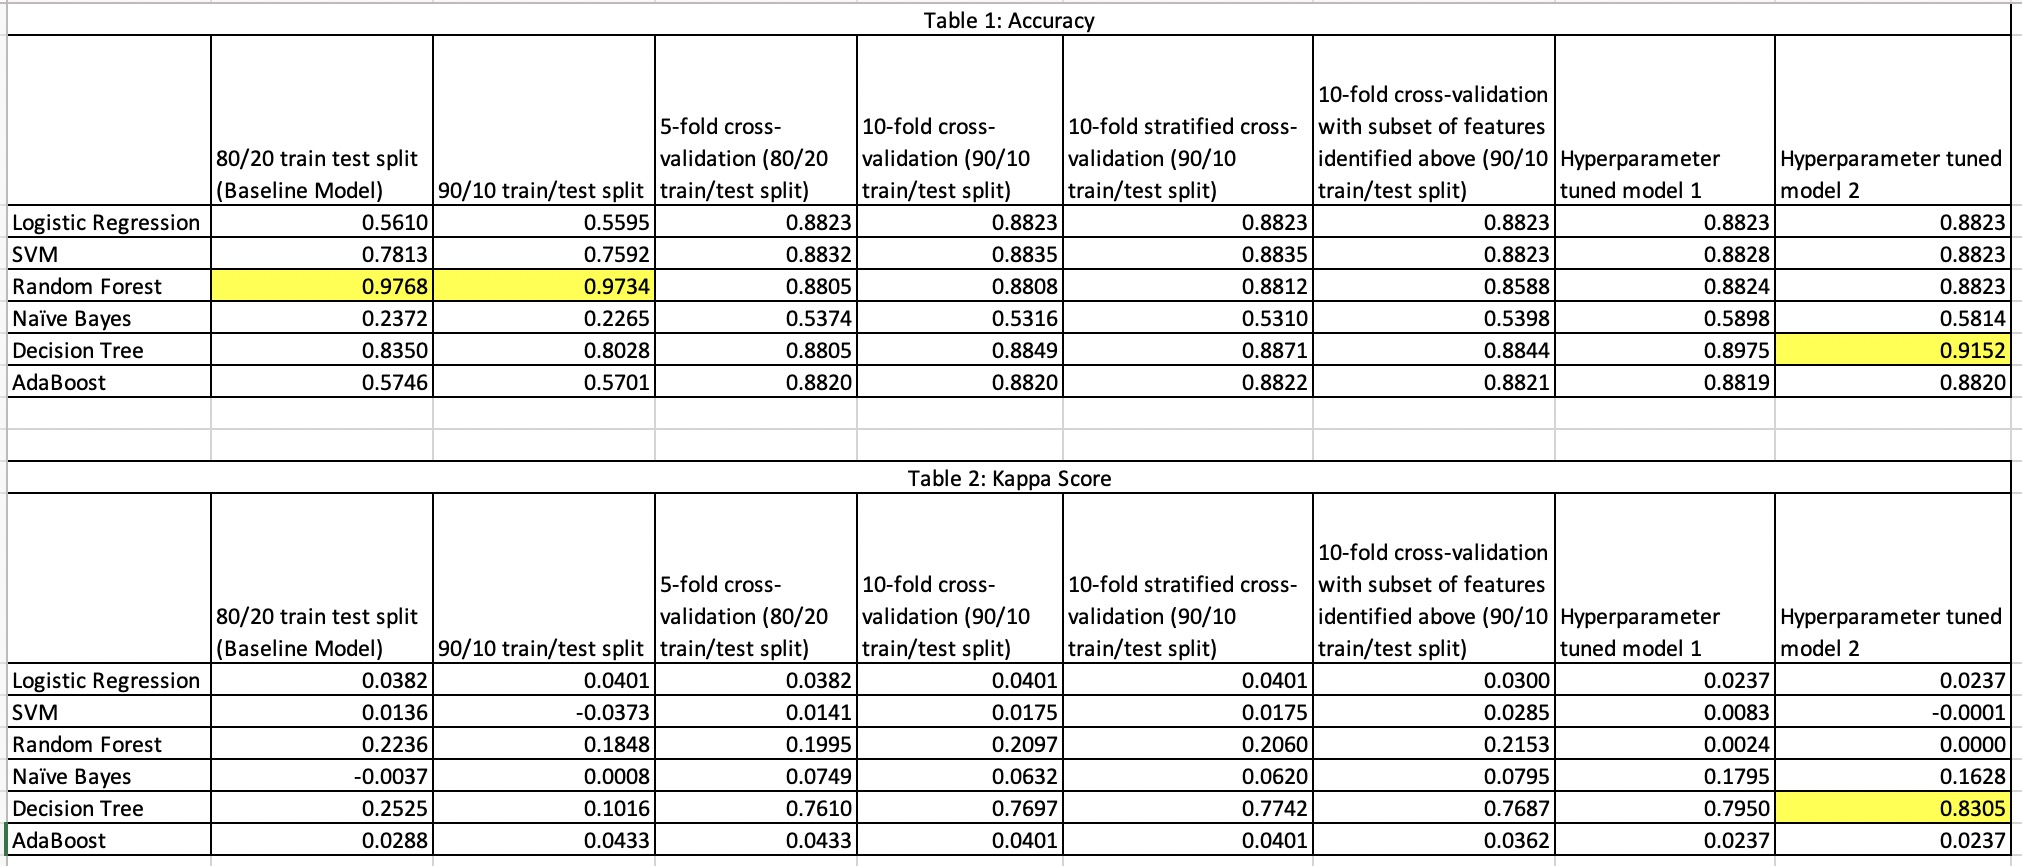

**2. Based on your table, which baseline model performed best? (5 points)**

The Accuracy score measures the proportion of correct predictions made by the model over the total number of predictions made. However, Accuracy can be misleading when there is a class imbalance in the dataset, where one class dominates the others.
The Kappa score, on the other hand, takes into account the possibility of the model making correct predictions by chance alone. It measures the agreement between the predicted labels and the actual labels, while taking into account the distribution of the classes.

Since our dataset is imbalanced, we use the Kappa score rather than the accuracy to determine the best model. Decision Tree model performed the best with accuracy 0.8350 and Kappa Score 0.2525. Decision tree algorithm is also the top three best model according to the accuracy.

**3. For each algorithm, which model performed best (out of the 7 optimizations + 1 baseline model)? Please create a table -- column 1 - agorithms; column 2 - best performing optimization (or baseline model) (5 points)**

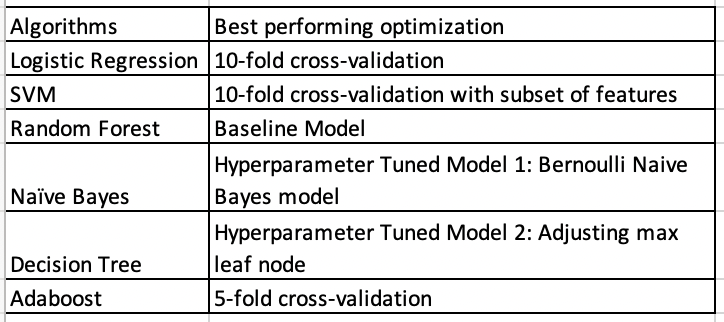

**4. Overall, which model performed the best? (5 points)**

Decision tree algorighms that adjusts max leaf node performed the best, with accuracy 0.9152 and Kappa Score 0.8305.

# Part 4: Unsupervised learning (45 points)

**1. Using principal component analysis, generate a dimensionality-reduced representation of the university dataset. Use all the standardized features (not the subset). (5 points)**


In [ ]:
new_data1 = pd.DataFrame()

In [ ]:
new_data1 = pd.concat([new_data1, new_data], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in new_data1:
    if new_data1[x].dtypes=='object':
        new_data1[x] = le.fit_transform(new_data1[x])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
new_data

Gender Own_car Own_property  Num_children           Income_type  \
0          M       Y            Y             0               Working   
1          M       Y            Y             0               Working   
2          M       Y            Y             0               Working   
3          F       N            Y             0  Commercial associate   
4          F       N            Y             0  Commercial associate   
...      ...     ...          ...           ...                   ...   
36452      M       Y            Y             0               Working   
36453      F       N            Y             0  Commercial associate   
36454      F       N            Y             0             Pensioner   
36455      F       N            Y             0               Working   
36456      M       N            Y             0               Working   

                      Education_type         Family_status       Housing_type  \
0                   Higher education        Civil marriage   Rented apartment   
1                   Higher education        Civil marriage   Rented apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
36452  Secondary / secondary special               Married  House / apartment   
36453               Higher education               Married  House / apartment   
36454               Higher education               Married  House / apartment   
36455  Secondary / secondary special               Married  House / apartment   
36456  Secondary / secondary special  Single / not married   Rented apartment   

       Work_phone  Phone  Email Occupation_type  Num_family  Target  \
0               1      0      0             NaN           2       1   
1               1      0      0             NaN           2       1   
2               0      0      0  Security staff           2       0   
3               0      1      1     Sales staff           1       0   
4               0      1      1     Sales staff           1       0   
...           ...    ...    ...             ...         ...     ...   
36452           0      0      0        Managers           2       1   
36453           0      1      1  Medicine staff           2       1   
36454           0      1      1  Medicine staff           2       1   
36455           0      0      0     Sales staff           2       1   
36456           0      0      0        Laborers           1       1   

       Unemployed  Total_income  Account_length       Age  Years_employed  
0               0      0.258721        0.250000  0.255676        0.289060  
1               0      0.258721        0.233333  0.255676        0.289060  
2               0      0.055233        0.483333  0.791768        0.072170  
3               0      0.156977        0.066667  0.657929        0.194170  
4               0      0.156977        0.433333  0.657929        0.194170  
...           ...           ...             ...       ...             ...  
36452           0      0.186047        0.183333  0.558172        0.154013  
36453           0      0.084302        0.383333  0.277303        0.084325  
36454           0      0.084302        0.533333  0.277303        0.084325  
36455           0      0.165698        0.150000  0.592708        0.041685  
36456           0      0.055233        0.216667  0.096190        0.075924  

[36457 rows x 19 columns]

In [ ]:
new_data1.head()

Gender  Own_car  Own_property  Num_children  Income_type  Education_type  \
0       1        1             1             0            4               1   
1       1        1             1             0            4               1   
2       1        1             1             0            4               4   
3       0        0             1             0            0               4   
4       0        0             1             0            0               4   

   Family_status  Housing_type  Work_phone  Phone  Email  Occupation_type  \
0              0             4           1      0      0               18   
1              0             4           1      0      0               18   
2              1             1           0      0      0               16   
3              3             1           0      1      1               14   
4              3             1           0      1      1               14   

   Num_family  Target  Unemployed  Total_income  Account_length       Age  \
0           2       1           0      0.258721        0.250000  0.255676   
1           2       1           0      0.258721        0.233333  0.255676   
2           2       0           0      0.055233        0.483333  0.791768   
3           1       0           0      0.156977        0.066667  0.657929   
4           1       0           0      0.156977        0.433333  0.657929   

   Years_employed  
0         0.28906  
1         0.28906  
2         0.07217  
3         0.19417  
4         0.19417

**2. Vary the number of components from 2 to 10. What percentage of variance is explained at each number of components? (5 points)**

In [ ]:
#print variance explained and total variance explained of different number of components, which range from 2-10
for i in range(2, 11):
  pca = PCA(n_components = i)
  pca.fit(new_data1)
  print("Number of components: ", i)
  print("Variance explained: ", pca.explained_variance_ratio_.round(5))
  print("Total variance explained: ", sum(pca.explained_variance_ratio_).round(5))
  print(" ")

Number of components:  2
Variance explained:  [0.79426 0.06487]
Total variance explained:  0.85913
 
Number of components:  3
Variance explained:  [0.79426 0.06487 0.03974]
Total variance explained:  0.89887
 
Number of components:  4
Variance explained:  [0.79426 0.06487 0.03974 0.03416]
Total variance explained:  0.93303
 
Number of components:  5
Variance explained:  [0.79426 0.06487 0.03974 0.03416 0.02017]
Total variance explained:  0.9532
 
Number of components:  6
Variance explained:  [0.79426 0.06487 0.03974 0.03416 0.02017 0.01484]
Total variance explained:  0.96804
 
Number of components:  7
Variance explained:  [0.79426 0.06487 0.03974 0.03416 0.02017 0.01484 0.00653]
Total variance explained:  0.97457
 
Number of components:  8
Variance explained:  [0.79426 0.06487 0.03974 0.03416 0.02017 0.01484 0.00653 0.00599]
Total variance explained:  0.98056
 
Number of components:  9
Variance explained:  [0.79426 0.06487 0.03974 0.03416 0.02017 0.01484 0.00653 0.00599 0.00434]
Total 

The percentage of variance is explained at each number of components from 2 to 10 are 85.91%, 89.88%, 93.30%, 95.32%, 96.80%, 97.45%, 98.05%, 98.49%, 98.81%

**3. Set the number of components to 4. Which features load together with high weight in each component? Make sure to explore each component individually. (5 points)**

In [ ]:
#set number of components to 4
pca = PCA(n_components=4)
components = pca.fit_transform(new_data1)

In [ ]:
#print top3 features of component 1
factors = pd.DataFrame({
    "Features": new_data1.columns,
    "Component 1": pca.components_[0]
})
factors.sort_values("Component 1", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 1 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 1 are Income_type, Num_family, and Num_children.


In [ ]:
#print top3 features of component 2
factors = pd.DataFrame({
    "Features": new_data1.columns,
    "Component 2": pca.components_[1]
})
factors.sort_values("Component 2", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 2 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 2 are Income_type, Education_type, and Num_family.


In [ ]:
#print top3 features of component 3
factors = pd.DataFrame({
    "Features": new_data1.columns,
    "Component 3": pca.components_[2]
})
factors.sort_values("Component 3", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 3 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 3 are Num_family, Num_children, and Income_type.


In [ ]:
#print top3 features of component 4
factors = pd.DataFrame({
    "Features": new_data1.columns,
    "Component 4": pca.components_[3]
})
factors.sort_values("Component 4", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 4 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 4 are Num_family, Num_children, and Education_type.


*   In component 1, the top 3 features are Income_type, Num_family, Num_children
*   In component 2, the top 3 features are Income_type, Education_type, Num_family
*   In component 3, the top 3 features are Num_family, Num_children, Income_type
*   In component 4, the top 3 features are Num_family, Num_children, Education_type

**4. Using the best overall performing model (from Part 3, Q4), execute the same model. This time, use the same label, but replace the features with the two principle components. (5 points)**

*report the accuracy score and cohen kappa*

In [ ]:
#replace features with the two principle components
X1 = new_data1[['Income_type', 'Num_family', 'Num_children', 'Education_type']]
y1 = new_data1['Target']

In [ ]:
#use the previous best performing model - decision tree with hyperparameter tuning 2

kappa_scorer = make_scorer(cohen_kappa_score)
model = DecisionTreeClassifier(random_state=123)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=123)
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X1_train, y1_train = sm.fit_resample(X1_train, y1_train)

dt_mxl = DecisionTreeClassifier(criterion="entropy", random_state=123, max_leaf_nodes=395)
dt_mxl.fit(X1_train, y1_train)
y_pred = dt_mxl.predict(X1_test)

# Calculate and print the estimated performance from 10-fold-validation
a_scores = cross_val_score(dt_mxl, X1_train, y1_train, cv = 10)

print("Performance from 10-fold cross-validation, adjusting max_leaf_nodes:")
print('Mean Accuracy: ', a_scores.mean())

kappa_scores = cross_val_score(dt_mxl, X1_train, y1_train, cv=10, scoring=kappa_scorer)
print("Mean Kappa Score: ", kappa_scores.mean())

Performance from 10-fold cross-validation, adjusting max_leaf_nodes:
Mean Accuracy:  0.5366156394219351
Mean Kappa Score:  0.07323687436666336


**5. How did the model accuracy using the two principal components compare to the model using all of the features? (5 points)**

The best preforming model is decision tree with hyperparameter tuning 2, the use of only two principal components leads to decreased accuracy (from 0.9152 to 0.5366) and kappa score (from 0.8305 to 0.073) as it may not capture enough information about the data.

**6. Tune a K-means cluster model on this dataset, using the standardized features. In particular, tune the number of clusters *K* to a level that, in your best judgment, produces representative clusters and appropriate complexity (5 points)**

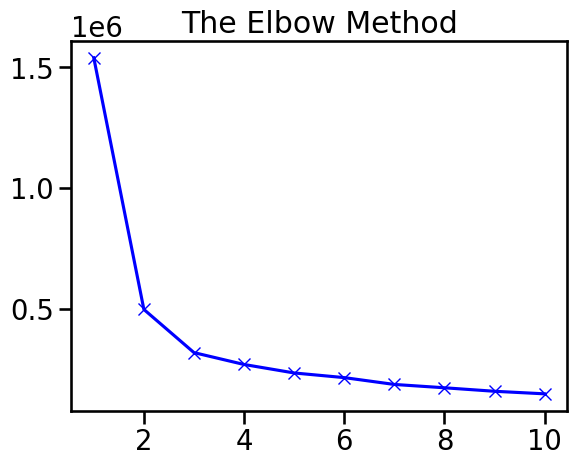

In [ ]:
#Form the dataframe on which to tune the model:

condensed_df = pd.DataFrame(components)

#Use elbow method to describe how many clusters is appropriate.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                random_state=0)
    km.fit(condensed_df)
    y_means=km.predict(condensed_df)
    distortions.append(km.inertia_)

#Produce the graph
plt.title("The Elbow Method")
plt.plot(range(1, 11),distortions, "bx-")
plt.show()

**7. Fit the model (5 points)**

In [ ]:
#Fitting the model, the number of clusters is set to 2 based on the above graph
km = KMeans(n_clusters=2,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                random_state=0)
km_predict = km.fit_predict(condensed_df)

In [ ]:
new_data1["Cluster_Prediction"] = km_predict

**8. Calculate cluster statistics to see how they are differentiated from each other (5 points)**

In [ ]:
#Calculate cluster statistics to see how they are differentiated from each other

for i in range(0, 2):
  new_data1_i = new_data1.loc[new_data1["Cluster_Prediction"] == i]
  print(f"Cluster {i+1} stats:")
  print(f"Percentage of all data: {round(100*len(new_data1_i)/len(new_data1), 2)}%")
  print(f"Income type: {round(np.mean(new_data1_i['Income_type']), 2)}")
  print(f"Number of family: {round(np.mean(new_data1_i['Num_family']), 2)}")
  print(f"Number of children: {round(np.mean(new_data1_i['Num_children']), 2)}")
  print(f"Education type: {round(np.mean(new_data1_i['Education_type']), 2)}")
  print()

Cluster 1 stats:
Percentage of all data: 44.29%
Income type: 2.01
Number of family: 2.07
Number of children: 0.33
Education type: 3.21

Cluster 2 stats:
Percentage of all data: 55.71%
Income type: 2.71
Number of family: 2.3
Number of children: 0.51
Education type: 3.01



**9. Visualize the clusters -- make sure the binary indicator you created for your label is colored differently (5 points)**

HINT: I want to see if your clusters are **really** differentiating

In [ ]:
# create an empty dataframe to store the results
df = pd.DataFrame(columns=['Cluster', 'Percentage (%)', 'Income type', 'Number of family', 'Number of children', 'Education type'])

# loop through each cluster
for i in range(0, 2):
    new_data1_i = new_data1.loc[new_data1["Cluster_Prediction"] == i]

    # calculate the statistics for the current cluster
    percentage = round(100*len(new_data1_i)/len(new_data1), 2)
    income_type = round(np.mean(new_data1_i['Income_type']), 2)
    num_family = round(np.mean(new_data1_i['Num_family']), 2)
    num_children = round(np.mean(new_data1_i['Num_children']), 2)
    education_type = round(np.mean(new_data1_i['Education_type']), 2)

    # append the statistics as a new row in the dataframe
    df = df.append({'Cluster': i+1, 'Percentage (%)': percentage, 'Income type': income_type,
                    'Number of family': num_family, 'Number of children': num_children,
                    'Education type': education_type}, ignore_index=True)

df = df.set_index("Cluster")
# df = df.transpose()
df

<ipython-input-54-13a378489ab7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Cluster': i+1, 'Percentage (%)': percentage, 'Income type': income_type,
<ipython-input-54-13a378489ab7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Cluster': i+1, 'Percentage (%)': percentage, 'Income type': income_type,


Percentage (%)  Income type  Number of family  Number of children  \
Cluster                                                                      
1.0               44.29         2.01              2.07                0.33   
2.0               55.71         2.71              2.30                0.51   

         Education type  
Cluster                  
1.0                3.21  
2.0                3.01

In [ ]:
import matplotlib.pyplot as plt
x = ["Cluster 1", "Cluster 2"]
c = ['red', 'blue']

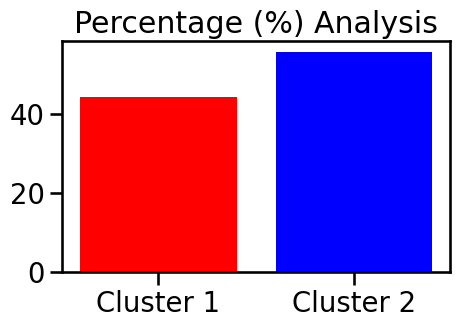

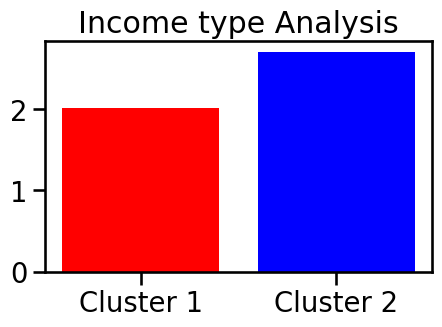

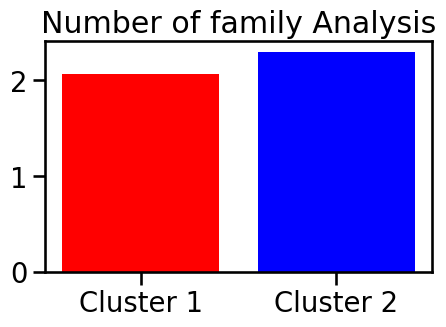

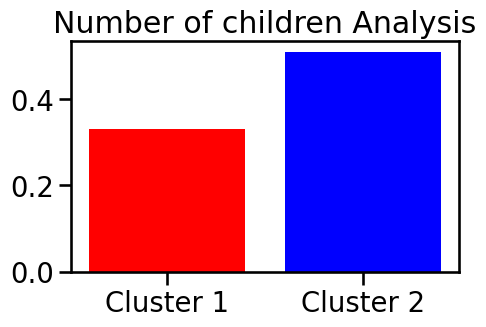

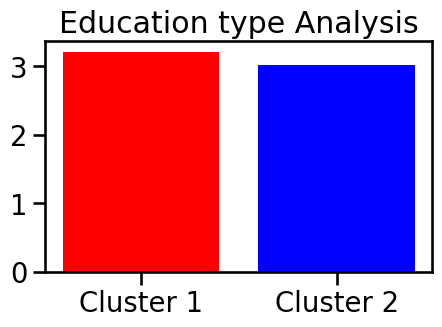

In [ ]:
# create bar plot for each column
for column in df.columns:
  plt.figure(figsize=(5, 3))
  plt.bar(x, height = df[column].tolist(), color = c)
  plt.title(f'{column} Analysis')
  plt.show()